In [83]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

In [84]:
path = os.path.join(os.getcwd(), 'loan_data_set.csv')
loans = pd.read_csv(path)

Now, let's create a data frame for the CSV file. 

In [85]:
df = pd.DataFrame(loans)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


First, let's drop the ID column as we will not need it for this data. 

In [86]:
df = df.drop('Loan_ID', axis=1)

In [87]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


The Loan_ID column is dropped. Now let's look at a brief summary of the numerical data. 

In [88]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Now, we want to find the missing values. We are first going to find the sum of the null values for each column.

In [89]:
# Looking for the number of null values. 
missing_values_count = df.isnull().sum()
missing_values_count

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Now, let's get the percentage of the data that is null.

In [90]:
# Getting the percentage of the data that is null
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
percentage_null = (total_missing/total_cells) * 100
percentage_null

2.022258414766558

Now, let's replace the null values for the numerical data with 0. 

In [91]:
df[['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Dependents']]=df[['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Dependents']].fillna(0)
df.isnull().sum()

Gender               13
Married               3
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

Now, let's plot a scatterplot of the loan amount against the applicants income. 

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

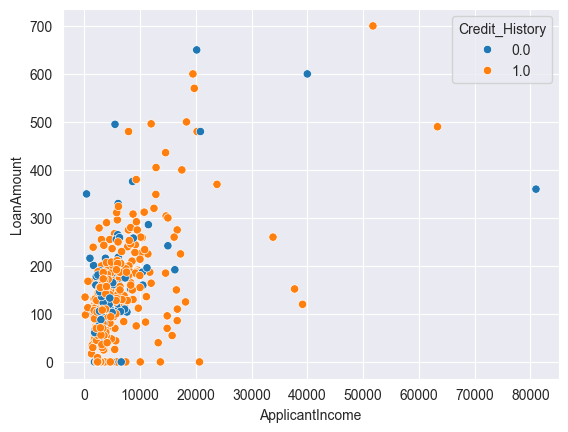

In [92]:
sns.scatterplot(x=df['ApplicantIncome'], y = df['LoanAmount'], hue=df['Credit_History'])

Let's start doing heatmaps. Our first heatmap will be to find any correlation between education and loan status (whether the person defaulted or not, N indicates default).

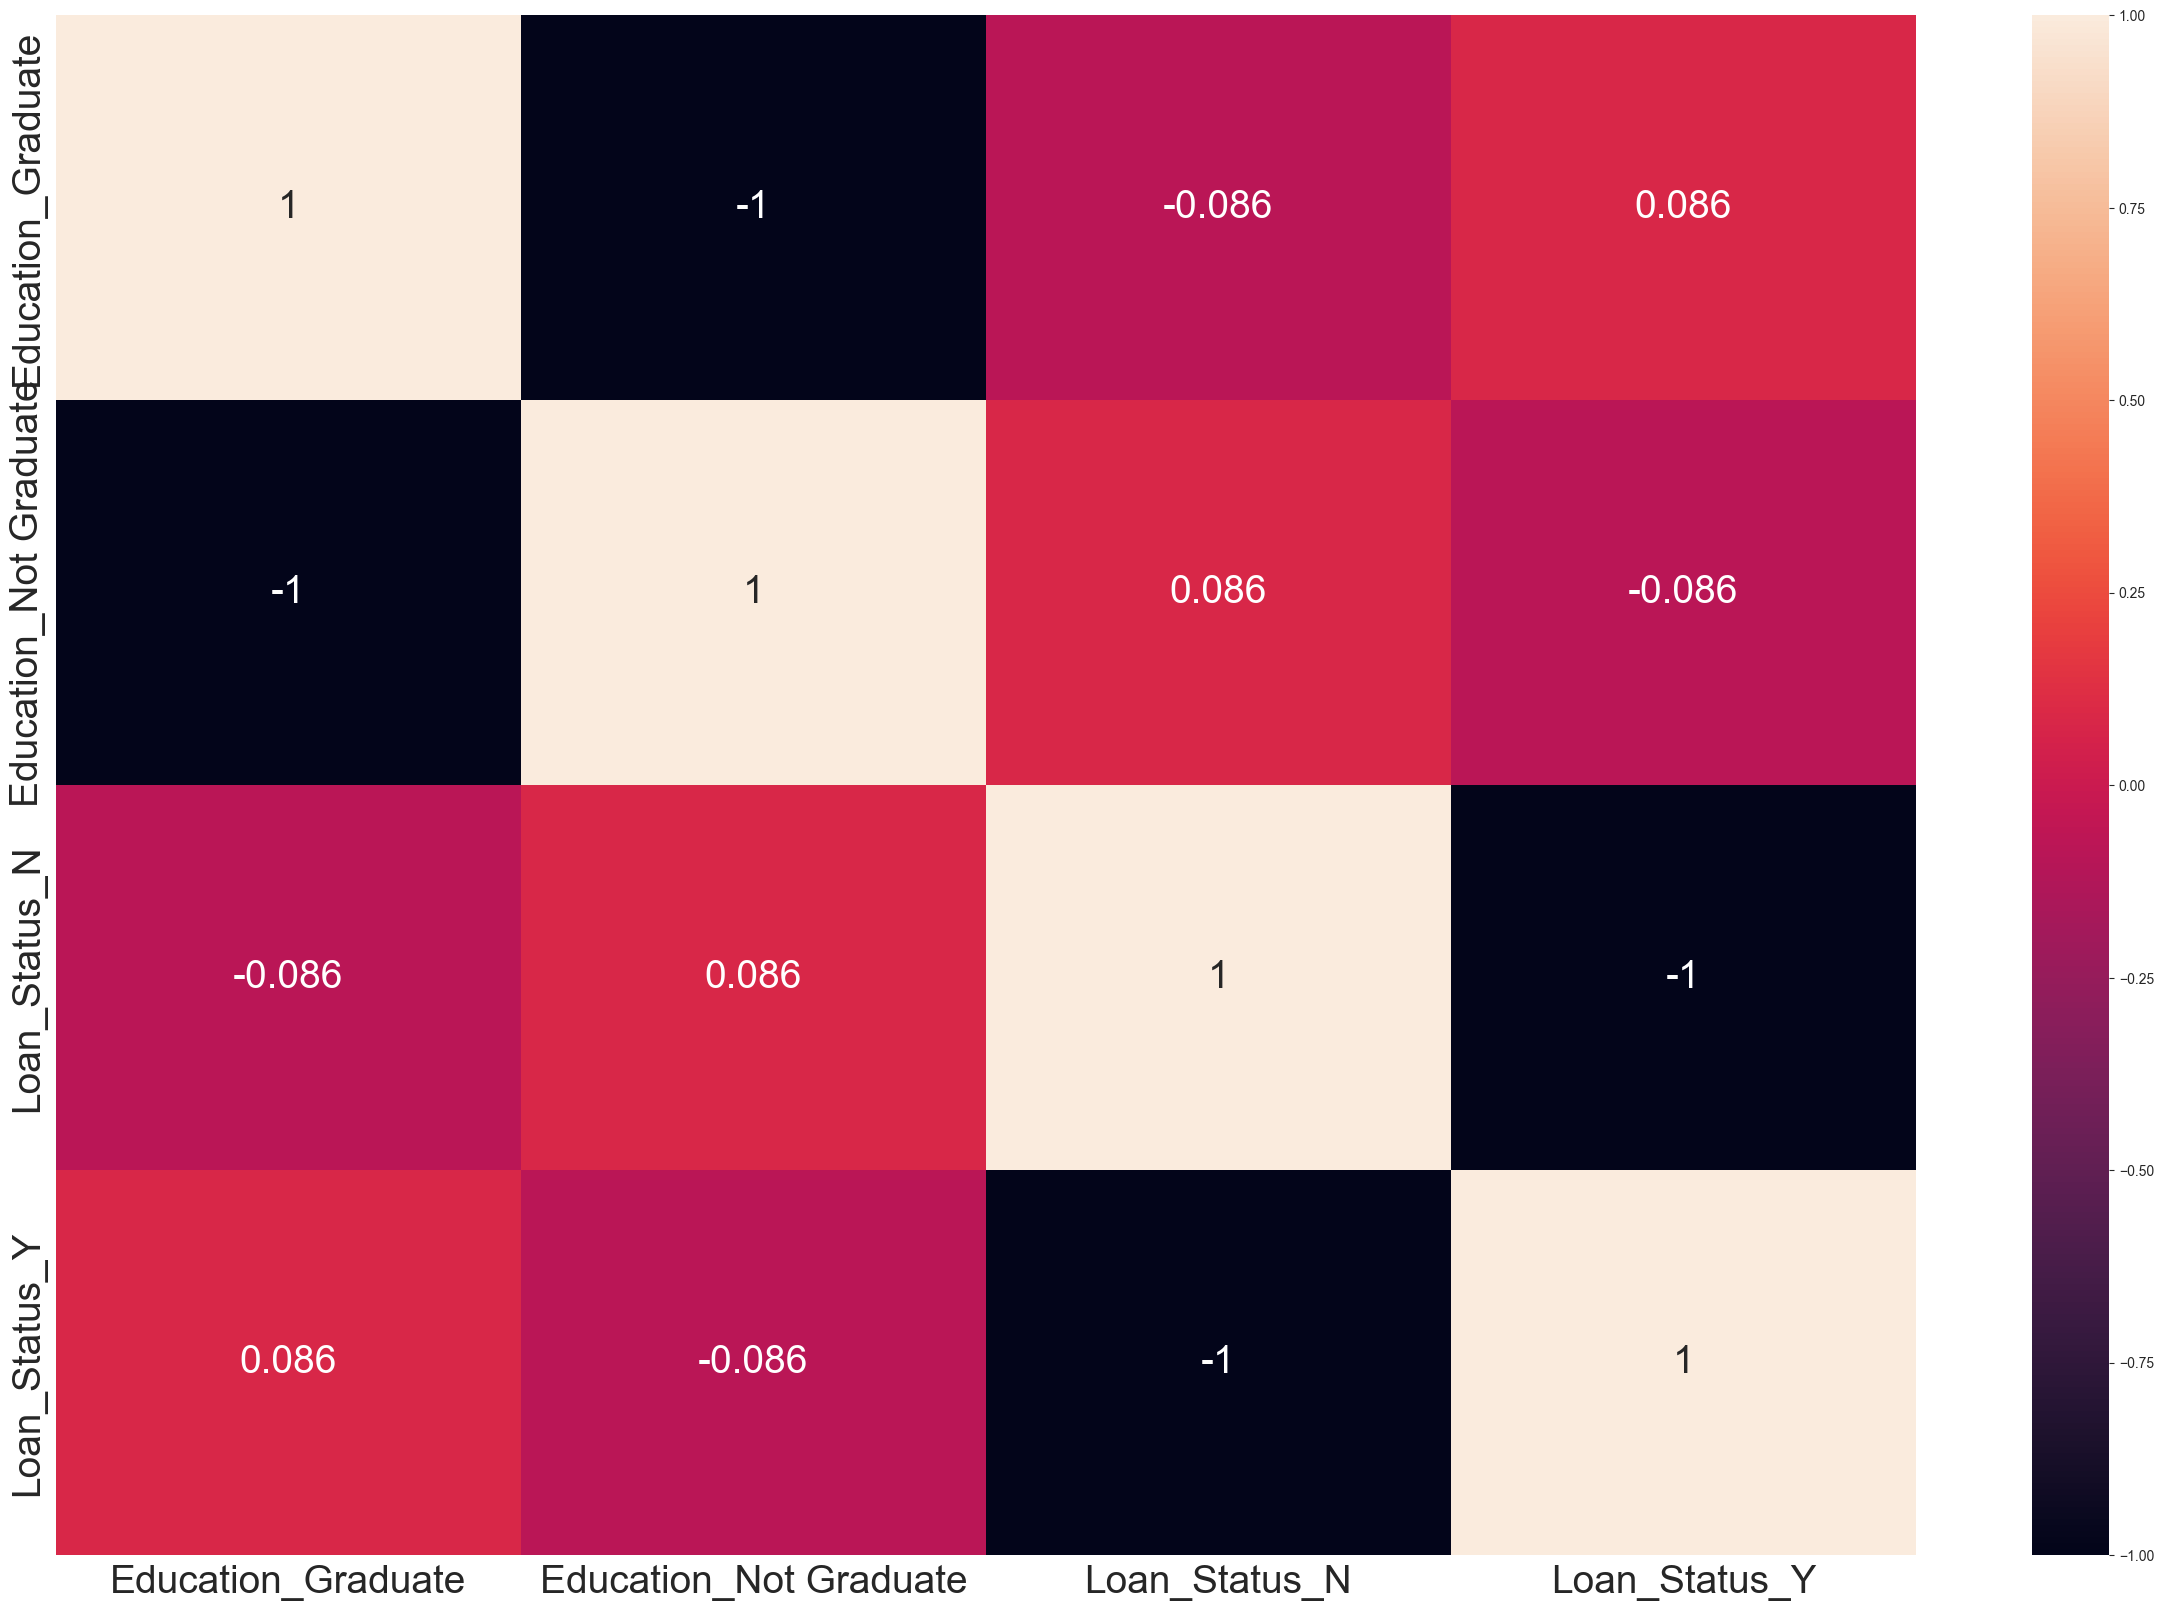

In [93]:
df_education = df[['Education', 'Loan_Status']]
df_education_encoded = pd.get_dummies(df_education)
correlation = df_education_encoded.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(data=correlation, annot=True, annot_kws={"size": 28})
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.show()

There doesn't seem to be a correlation between education and loan status. Now let's make a bar graph of the education against the average loan amount. 

<Axes: xlabel='Education', ylabel='LoanAmount'>

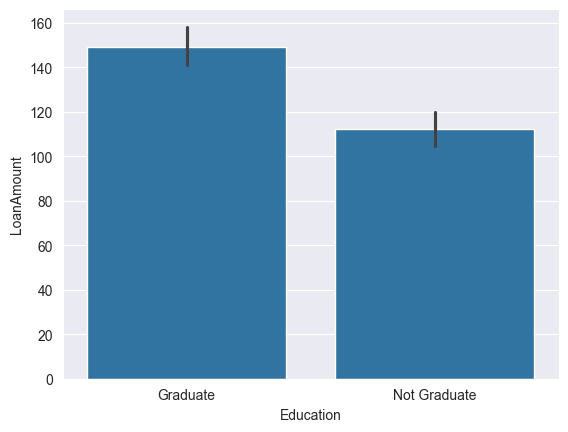

In [94]:
sns.barplot(data=df, x=df['Education'], y=df['LoanAmount'])

Now, let's do a multiple bar chart for loan status for graduates/non-graduates. 

<Axes: xlabel='Education', ylabel='count'>

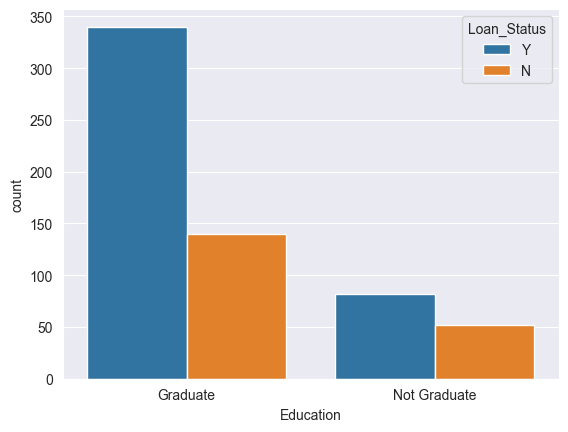

In [95]:
# Plotting status of loan for people depending on their level of education
sns.countplot(data=df, x='Education', hue='Loan_Status')

<Axes: xlabel='Property_Area', ylabel='LoanAmount'>

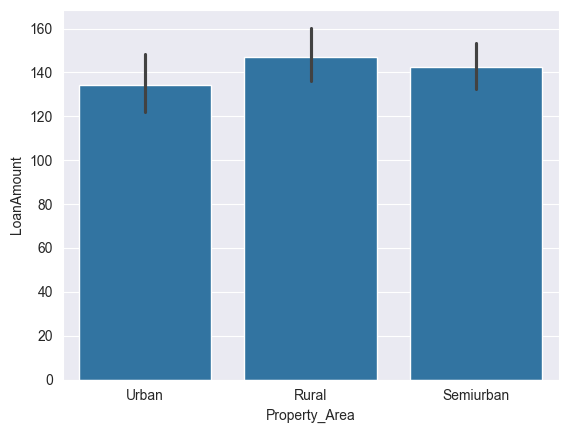

In [96]:
sns.barplot(data=df, x=df['Property_Area'], y=df['LoanAmount'])

Let's represent this data as percentages, so we'll have two bar charts for graduate/non-graduate respectively, showing the percentage of people that defaulted/did not default on their loans. 

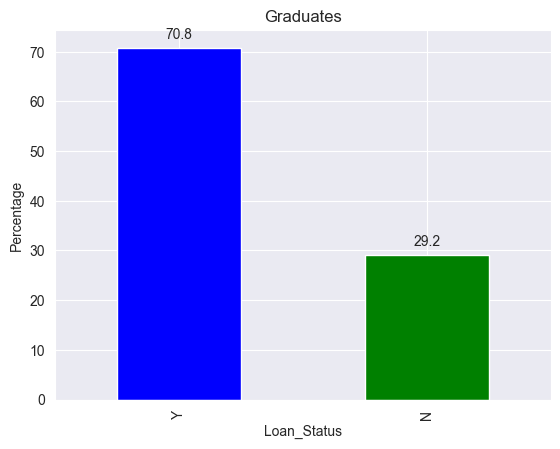

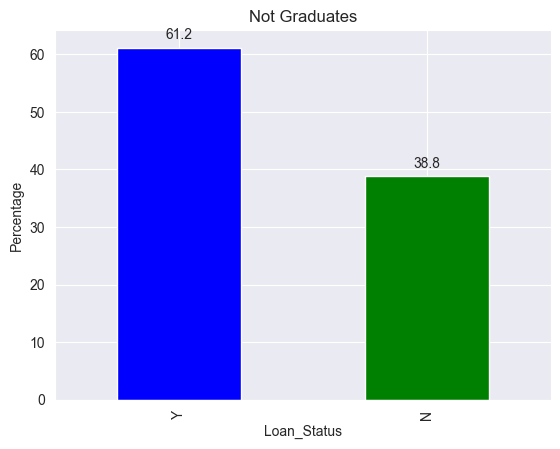

In [97]:
# Filter the DataFrame to get only the rows where 'Education' is 'Graduate'
df_graduates = df[df['Education'] == 'Graduate']

# Filter the DataFrame to get only the rows where 'Education' is 'Not Graduate'
df_not_graduates = df[df['Education'] == 'Not Graduate']

# Calculate the percentage of 'Loan_Status' for each 'Loan_Status' category for graduates
loan_status_counts_graduates = df_graduates['Loan_Status'].value_counts(normalize=True) * 100

# Calculate the percentage of 'Loan_Status' for each 'Loan_Status' category for non-graduates
loan_status_counts_not_graduates = df_not_graduates['Loan_Status'].value_counts(normalize=True) * 100

ax1 = loan_status_counts_graduates.plot(kind='bar', title='Graduates', color=['b', 'g'])
plt.ylabel('Percentage')

# Add data labels
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.1f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 9),
                 textcoords = 'offset points')

plt.show()

# Create a bar plot for the non-graduates with different colors for each bar
ax2 = loan_status_counts_not_graduates.plot(kind='bar', title='Not Graduates', color=['b', 'g'])
plt.ylabel('Percentage')

# Add data labels
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.1f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 9),
                 textcoords = 'offset points')

plt.show()

Now, let's find the correlation between loan status and the amount of dependents that the applicant has. 

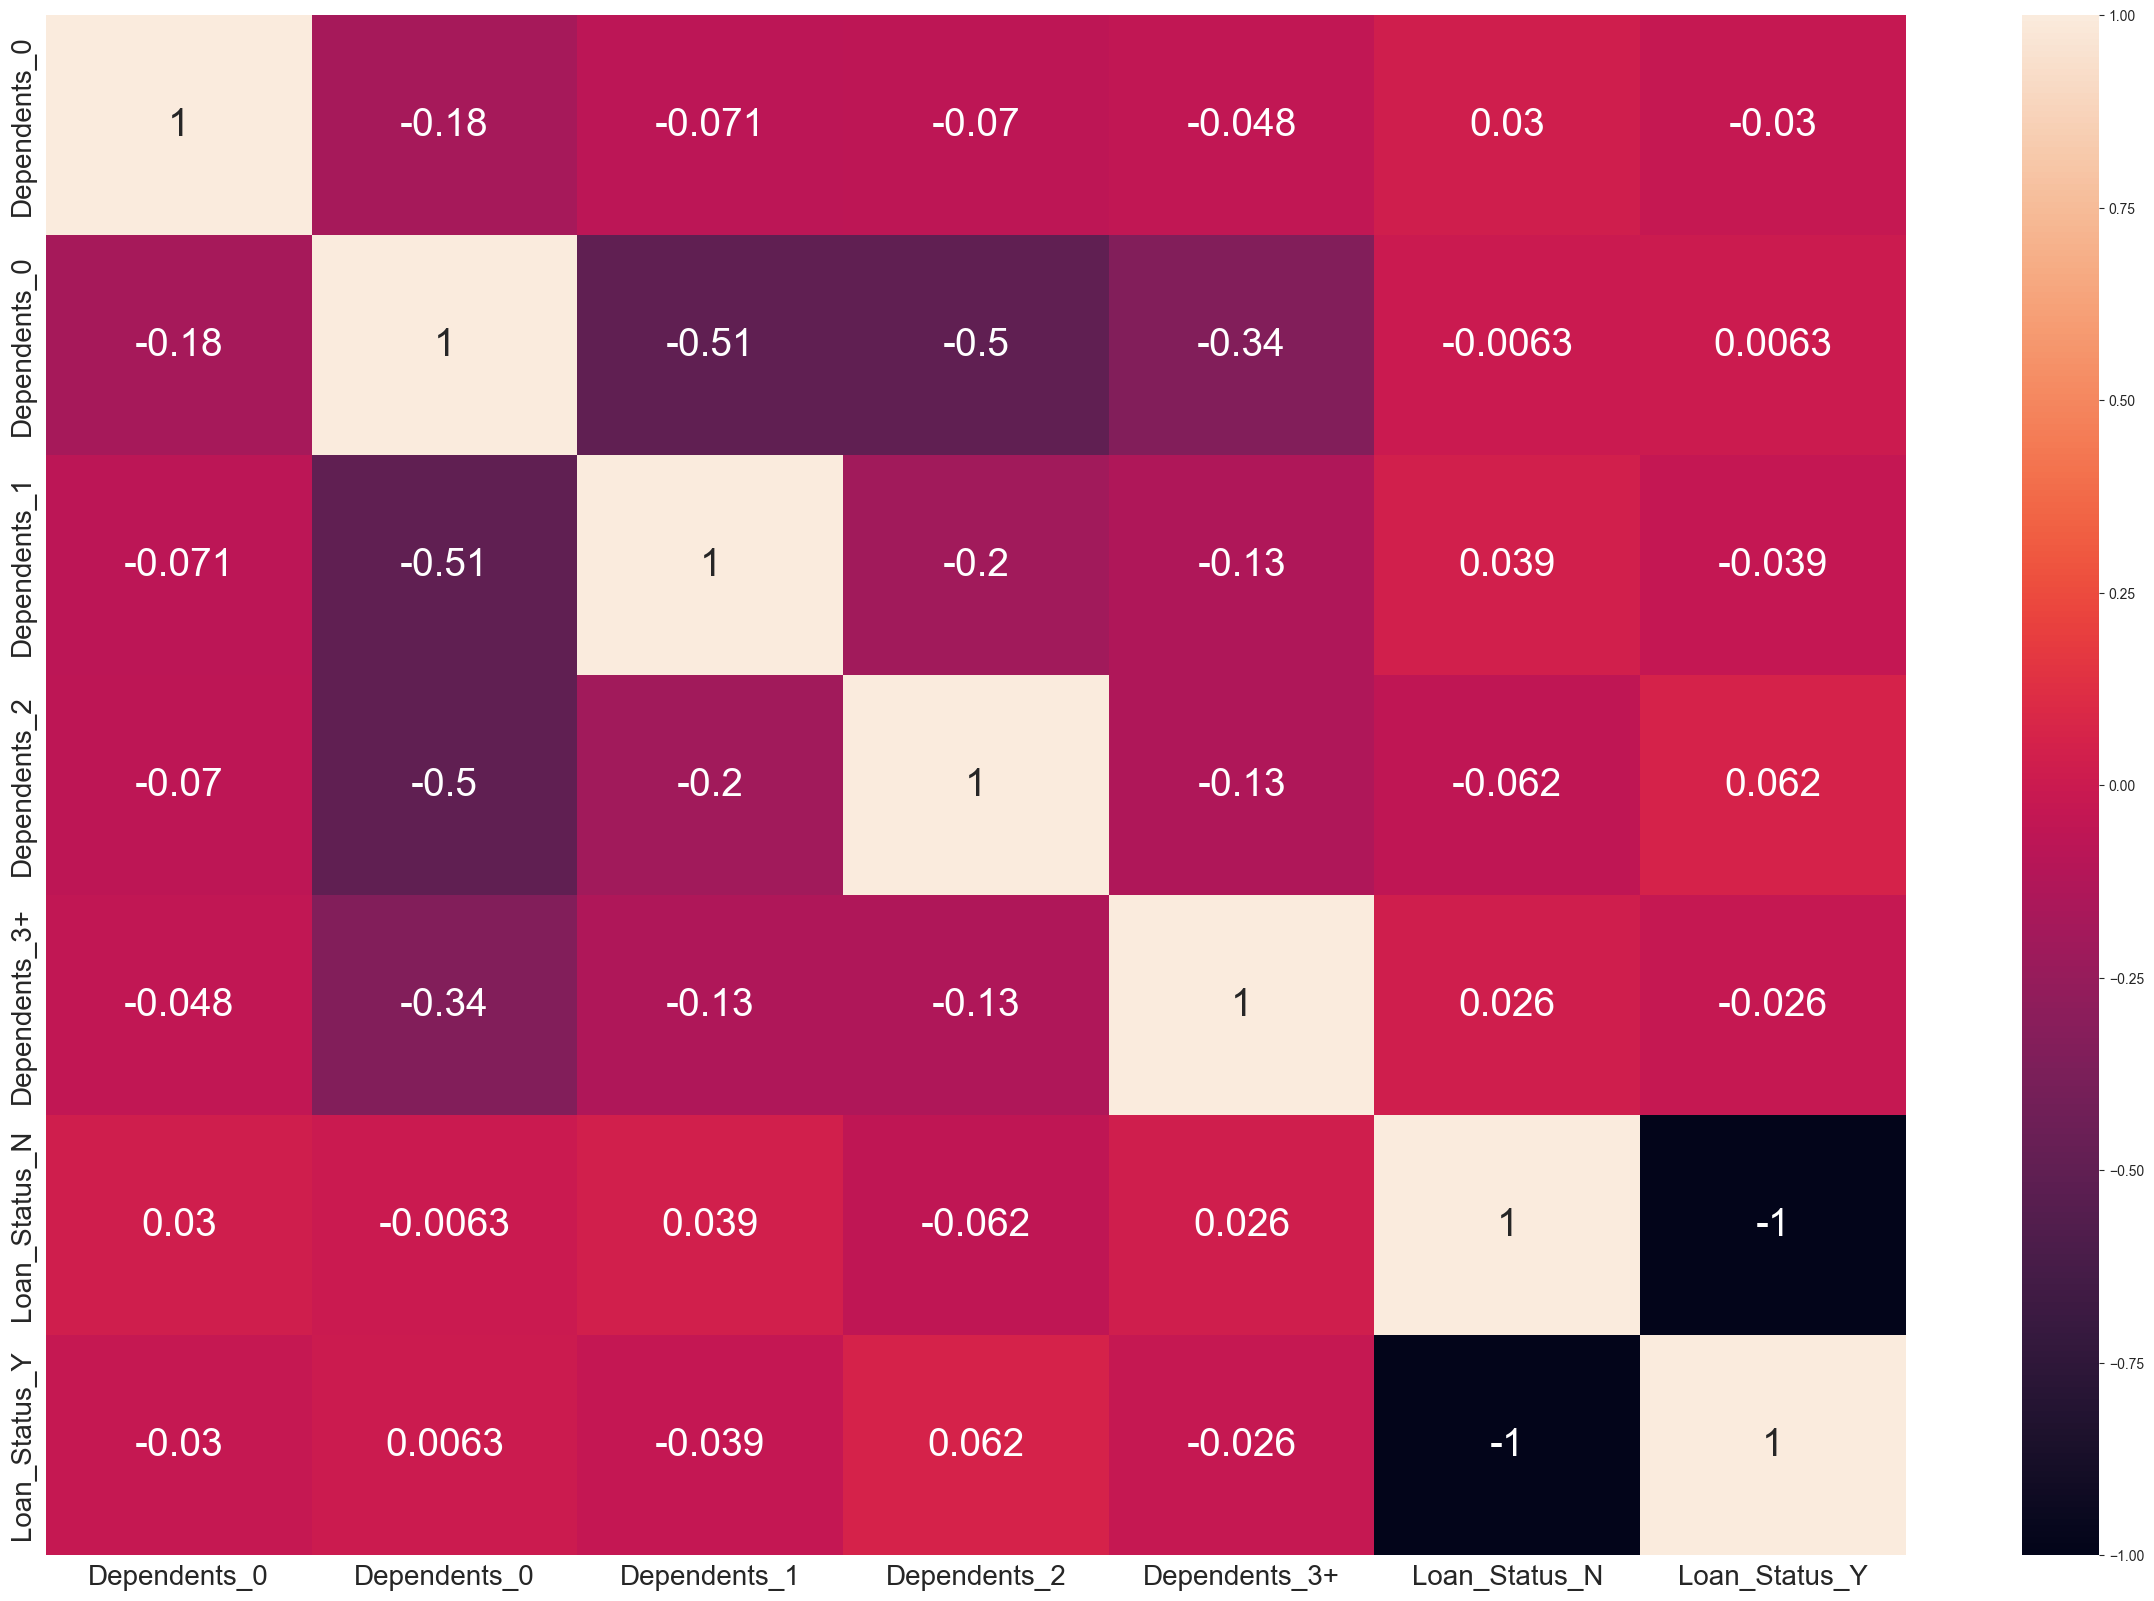

In [98]:
df_dependents = df[['Dependents', 'Loan_Status']]
df_dependents_encoded = pd.get_dummies(df_dependents)
correlation = df_dependents_encoded.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(data=correlation, annot=True, annot_kws={"size": 28})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Now, let's find the correlation between loan status and whether the applicant is married or not.

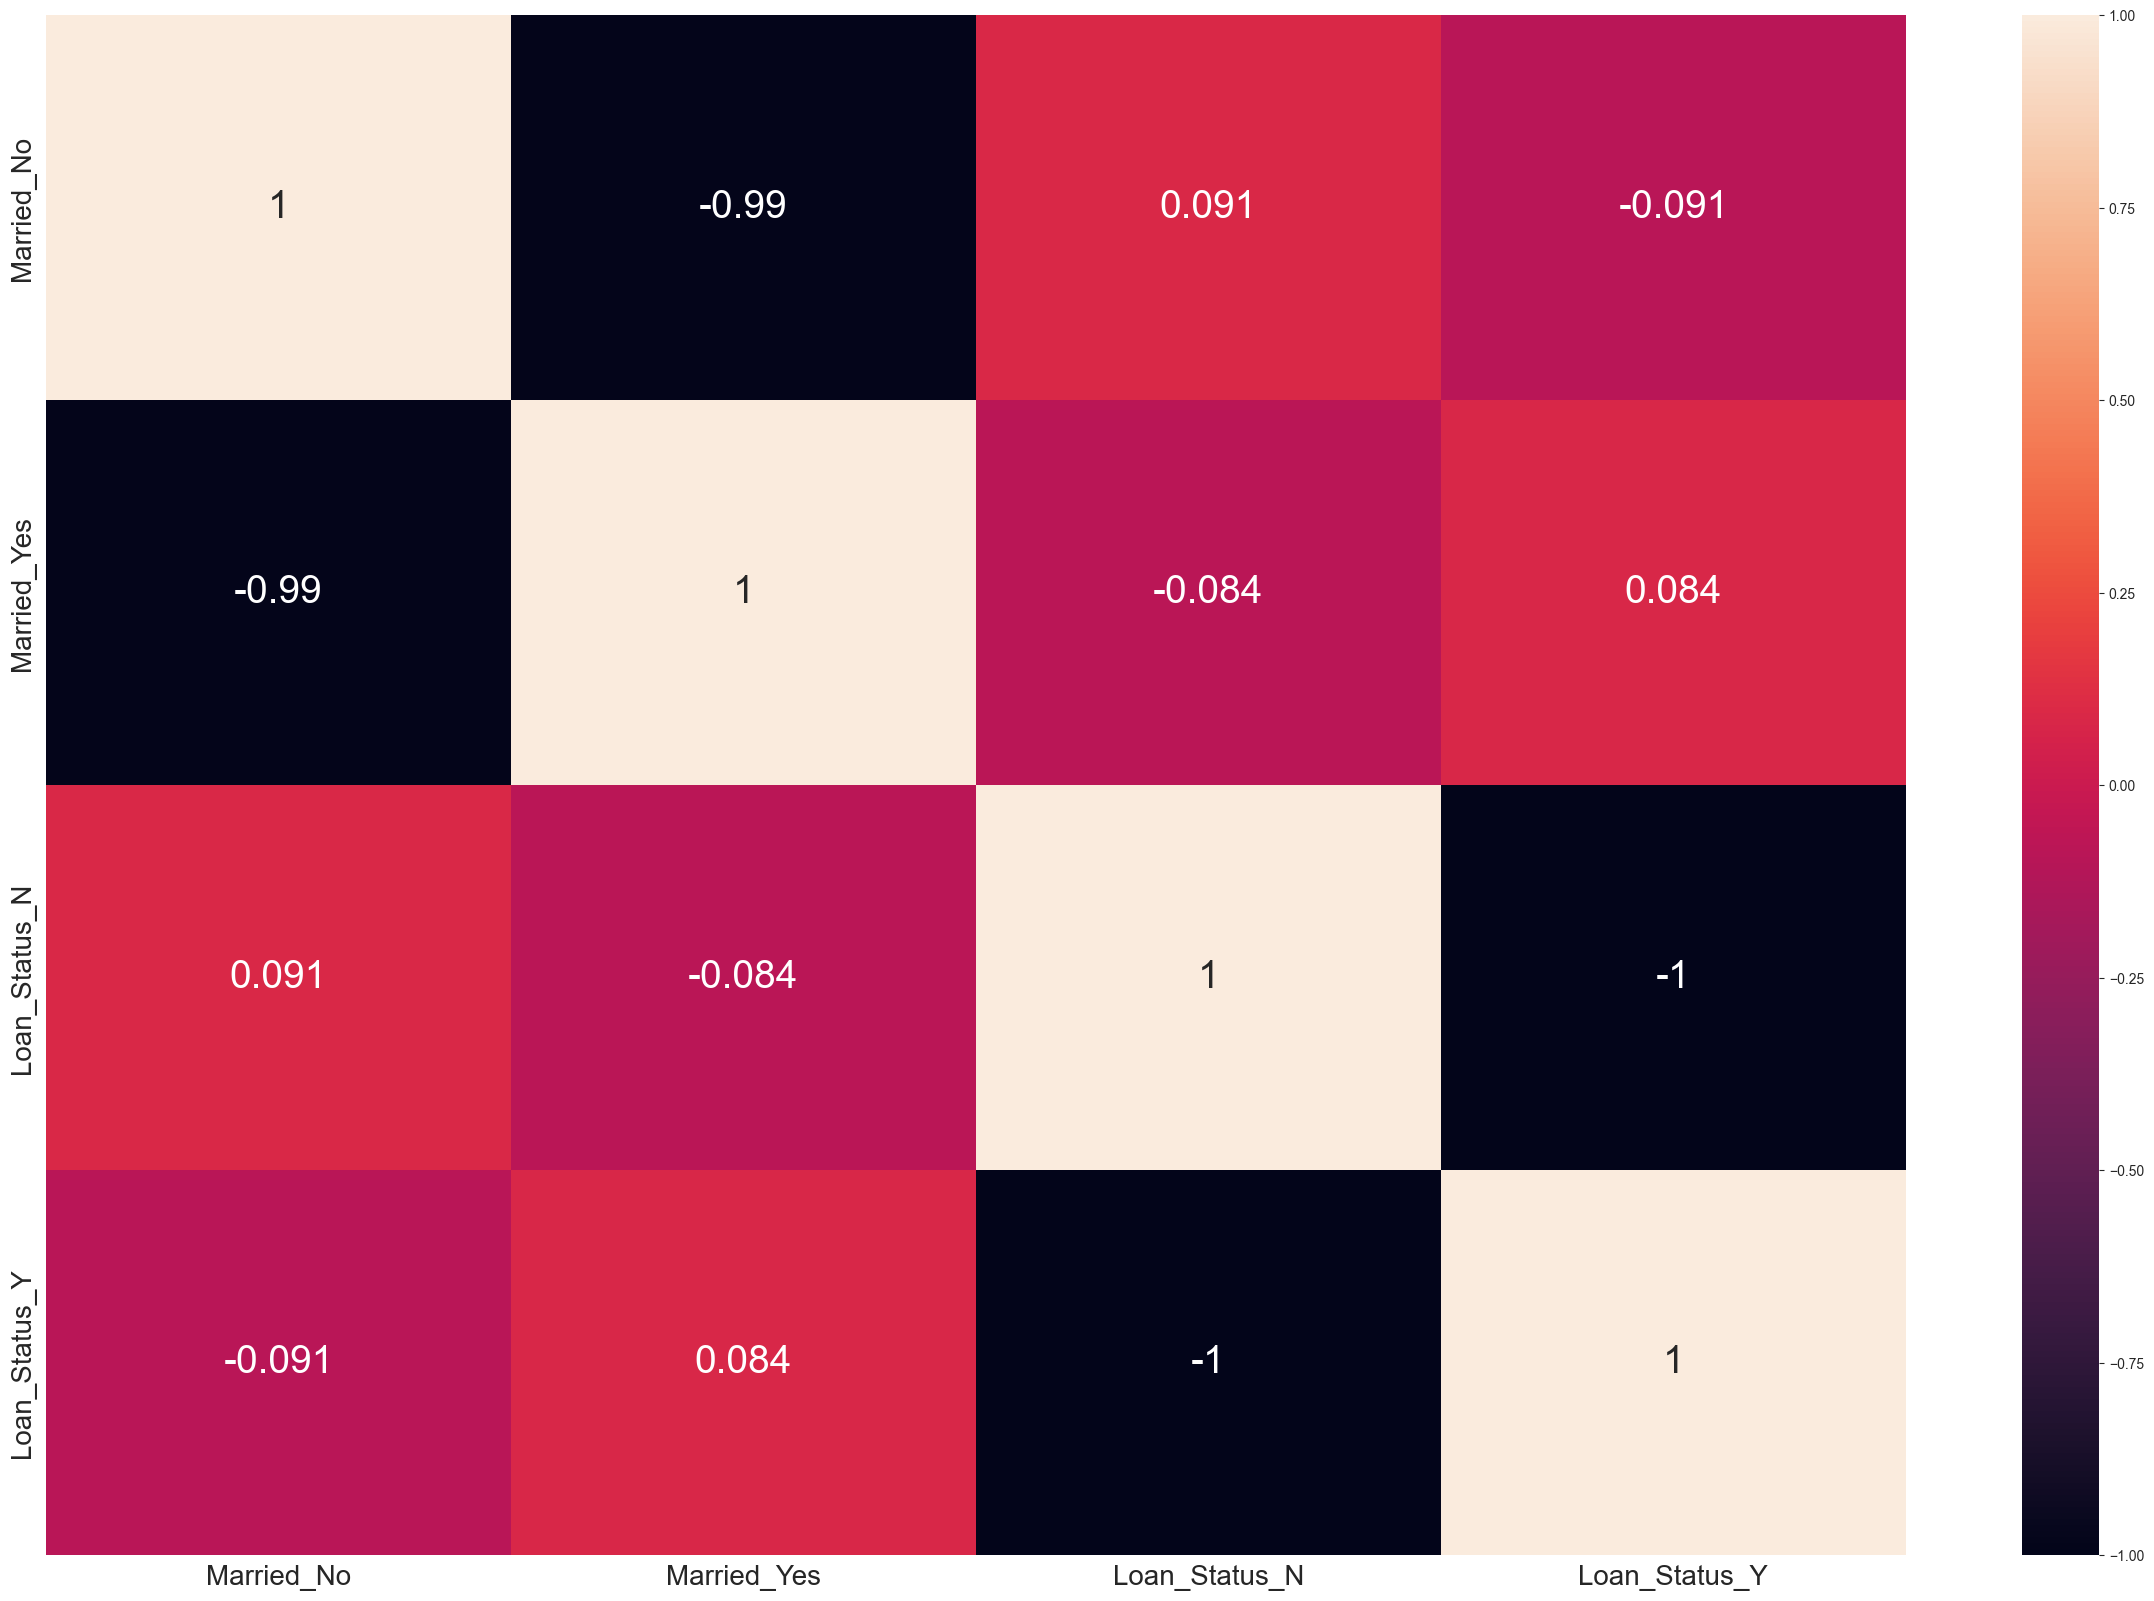

In [99]:
df_married = df[['Married', 'Loan_Status']]
df_married_encoded = pd.get_dummies(df_married)
correlation = df_married_encoded.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(data=correlation, annot=True, annot_kws={"size": 28})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Now, let's find the correlation between loan status and the loan amount term.

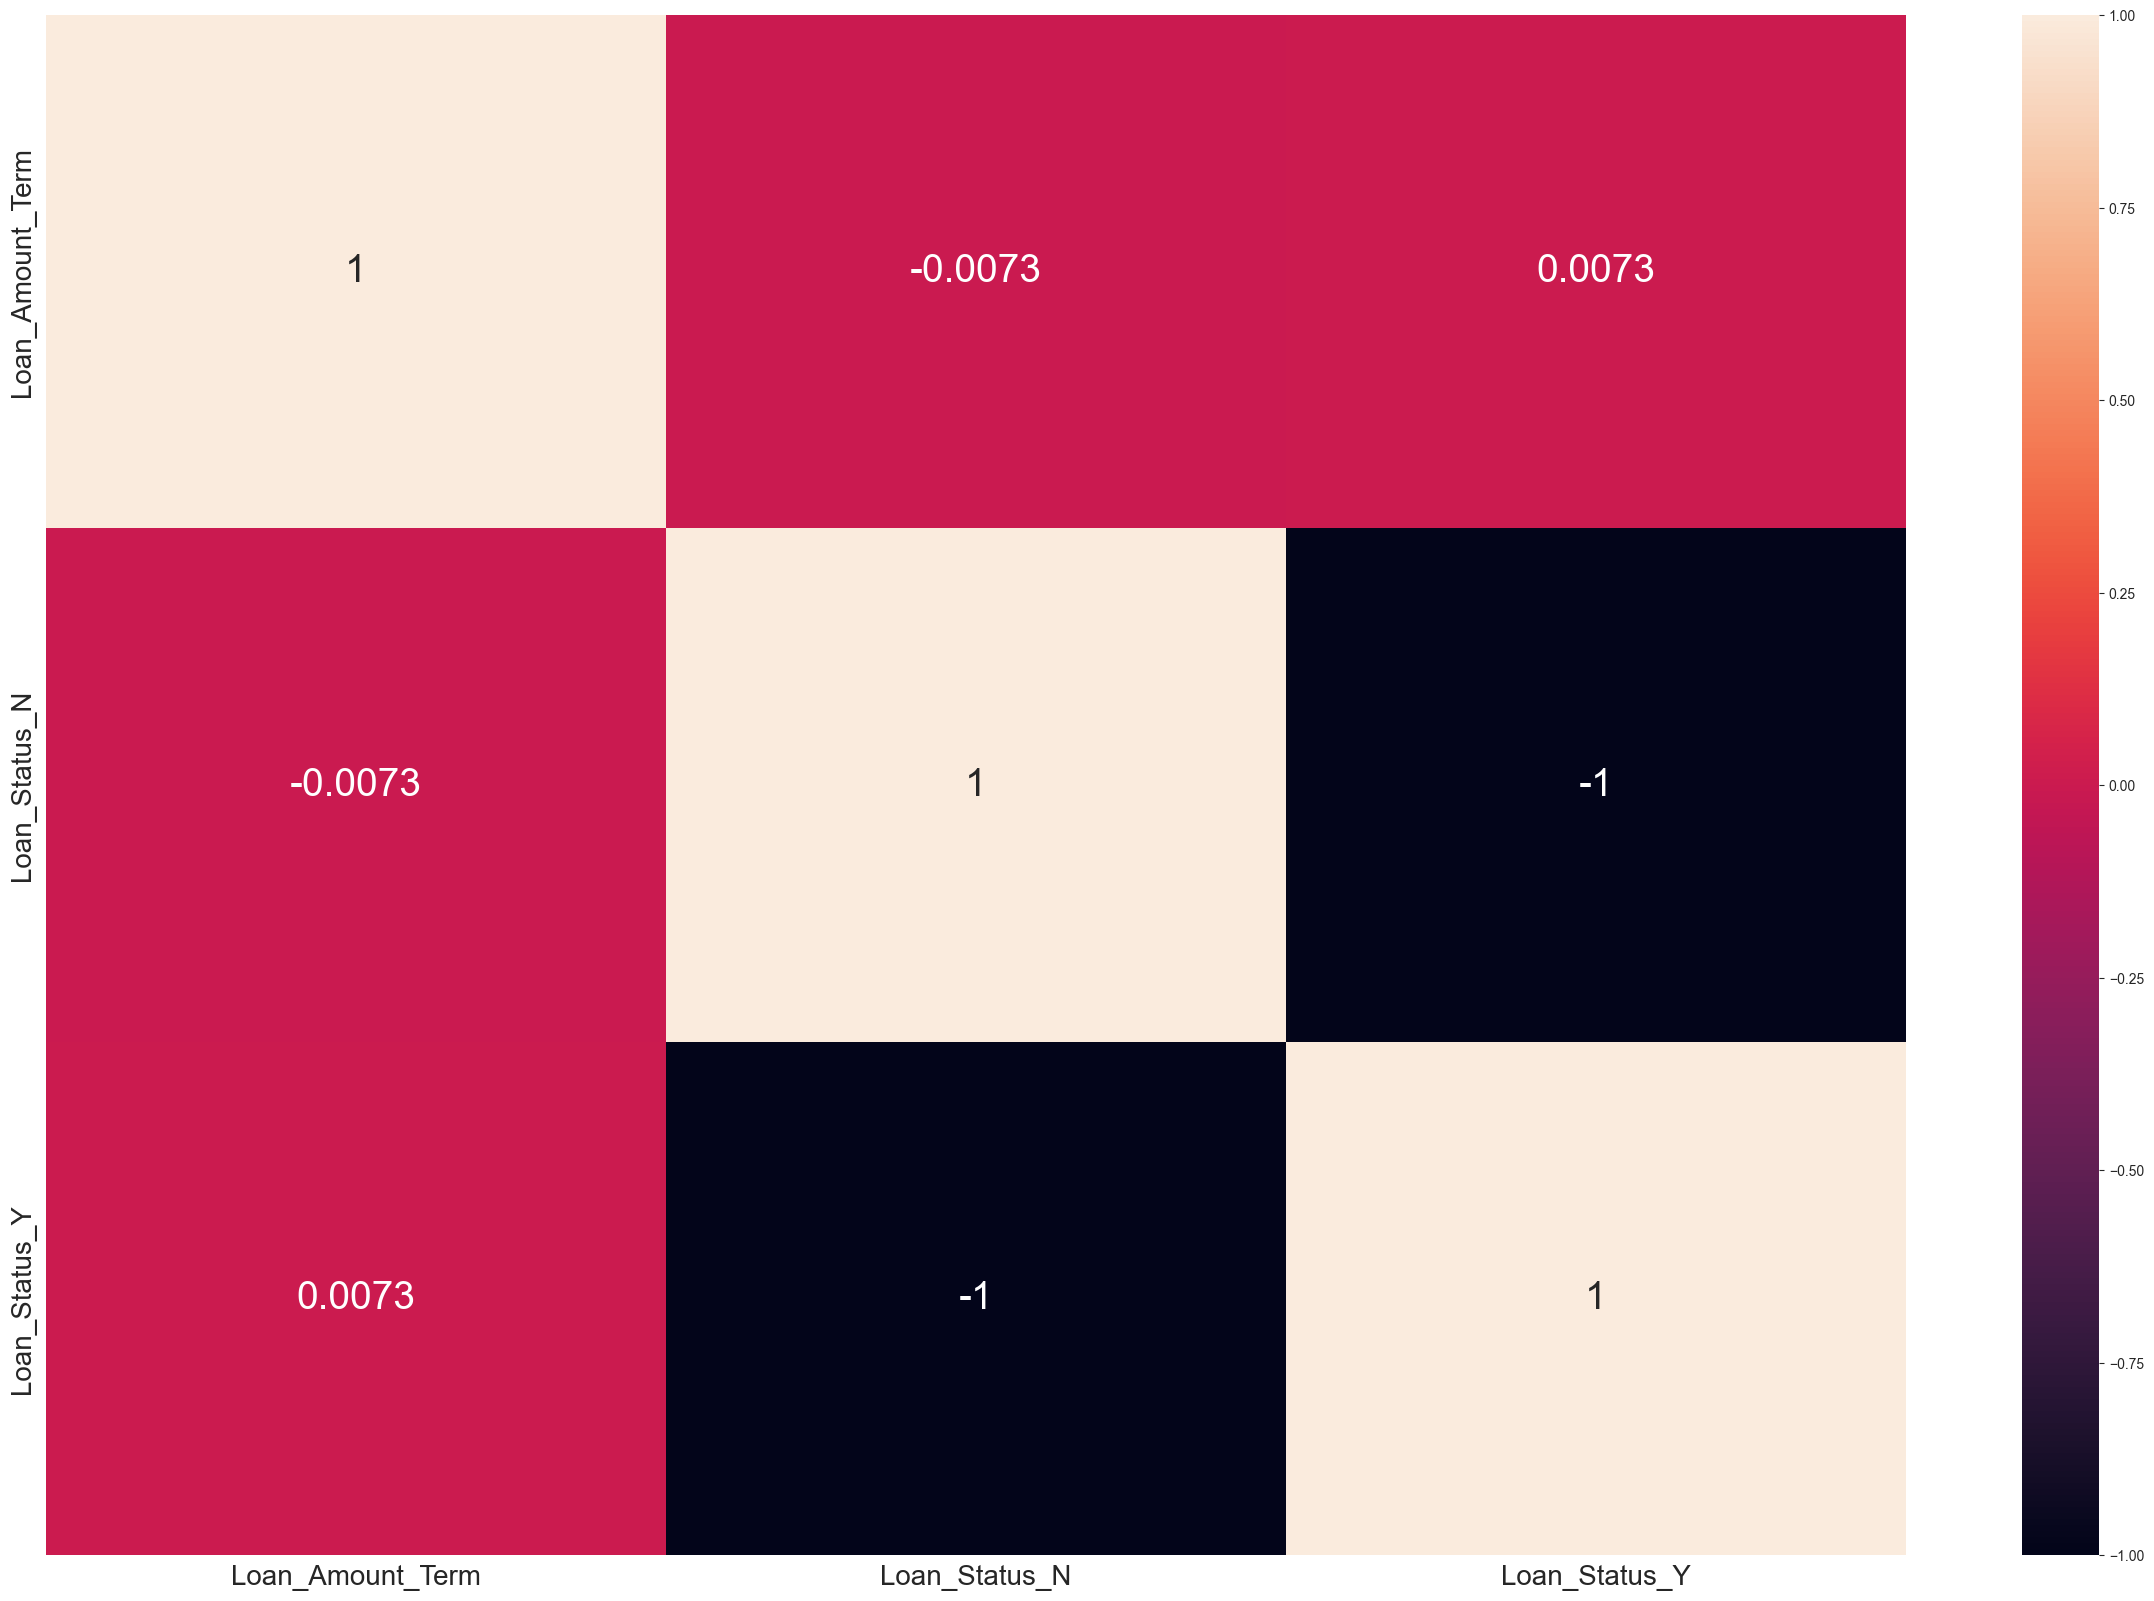

In [100]:
df_loanterm = df[['Loan_Amount_Term', 'Loan_Status']]
df_loanterm_encoded = pd.get_dummies(df_loanterm)
correlation = df_loanterm_encoded.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(data=correlation, annot=True, annot_kws={"size": 28})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Now, let's find the correlation between gender and loan status.

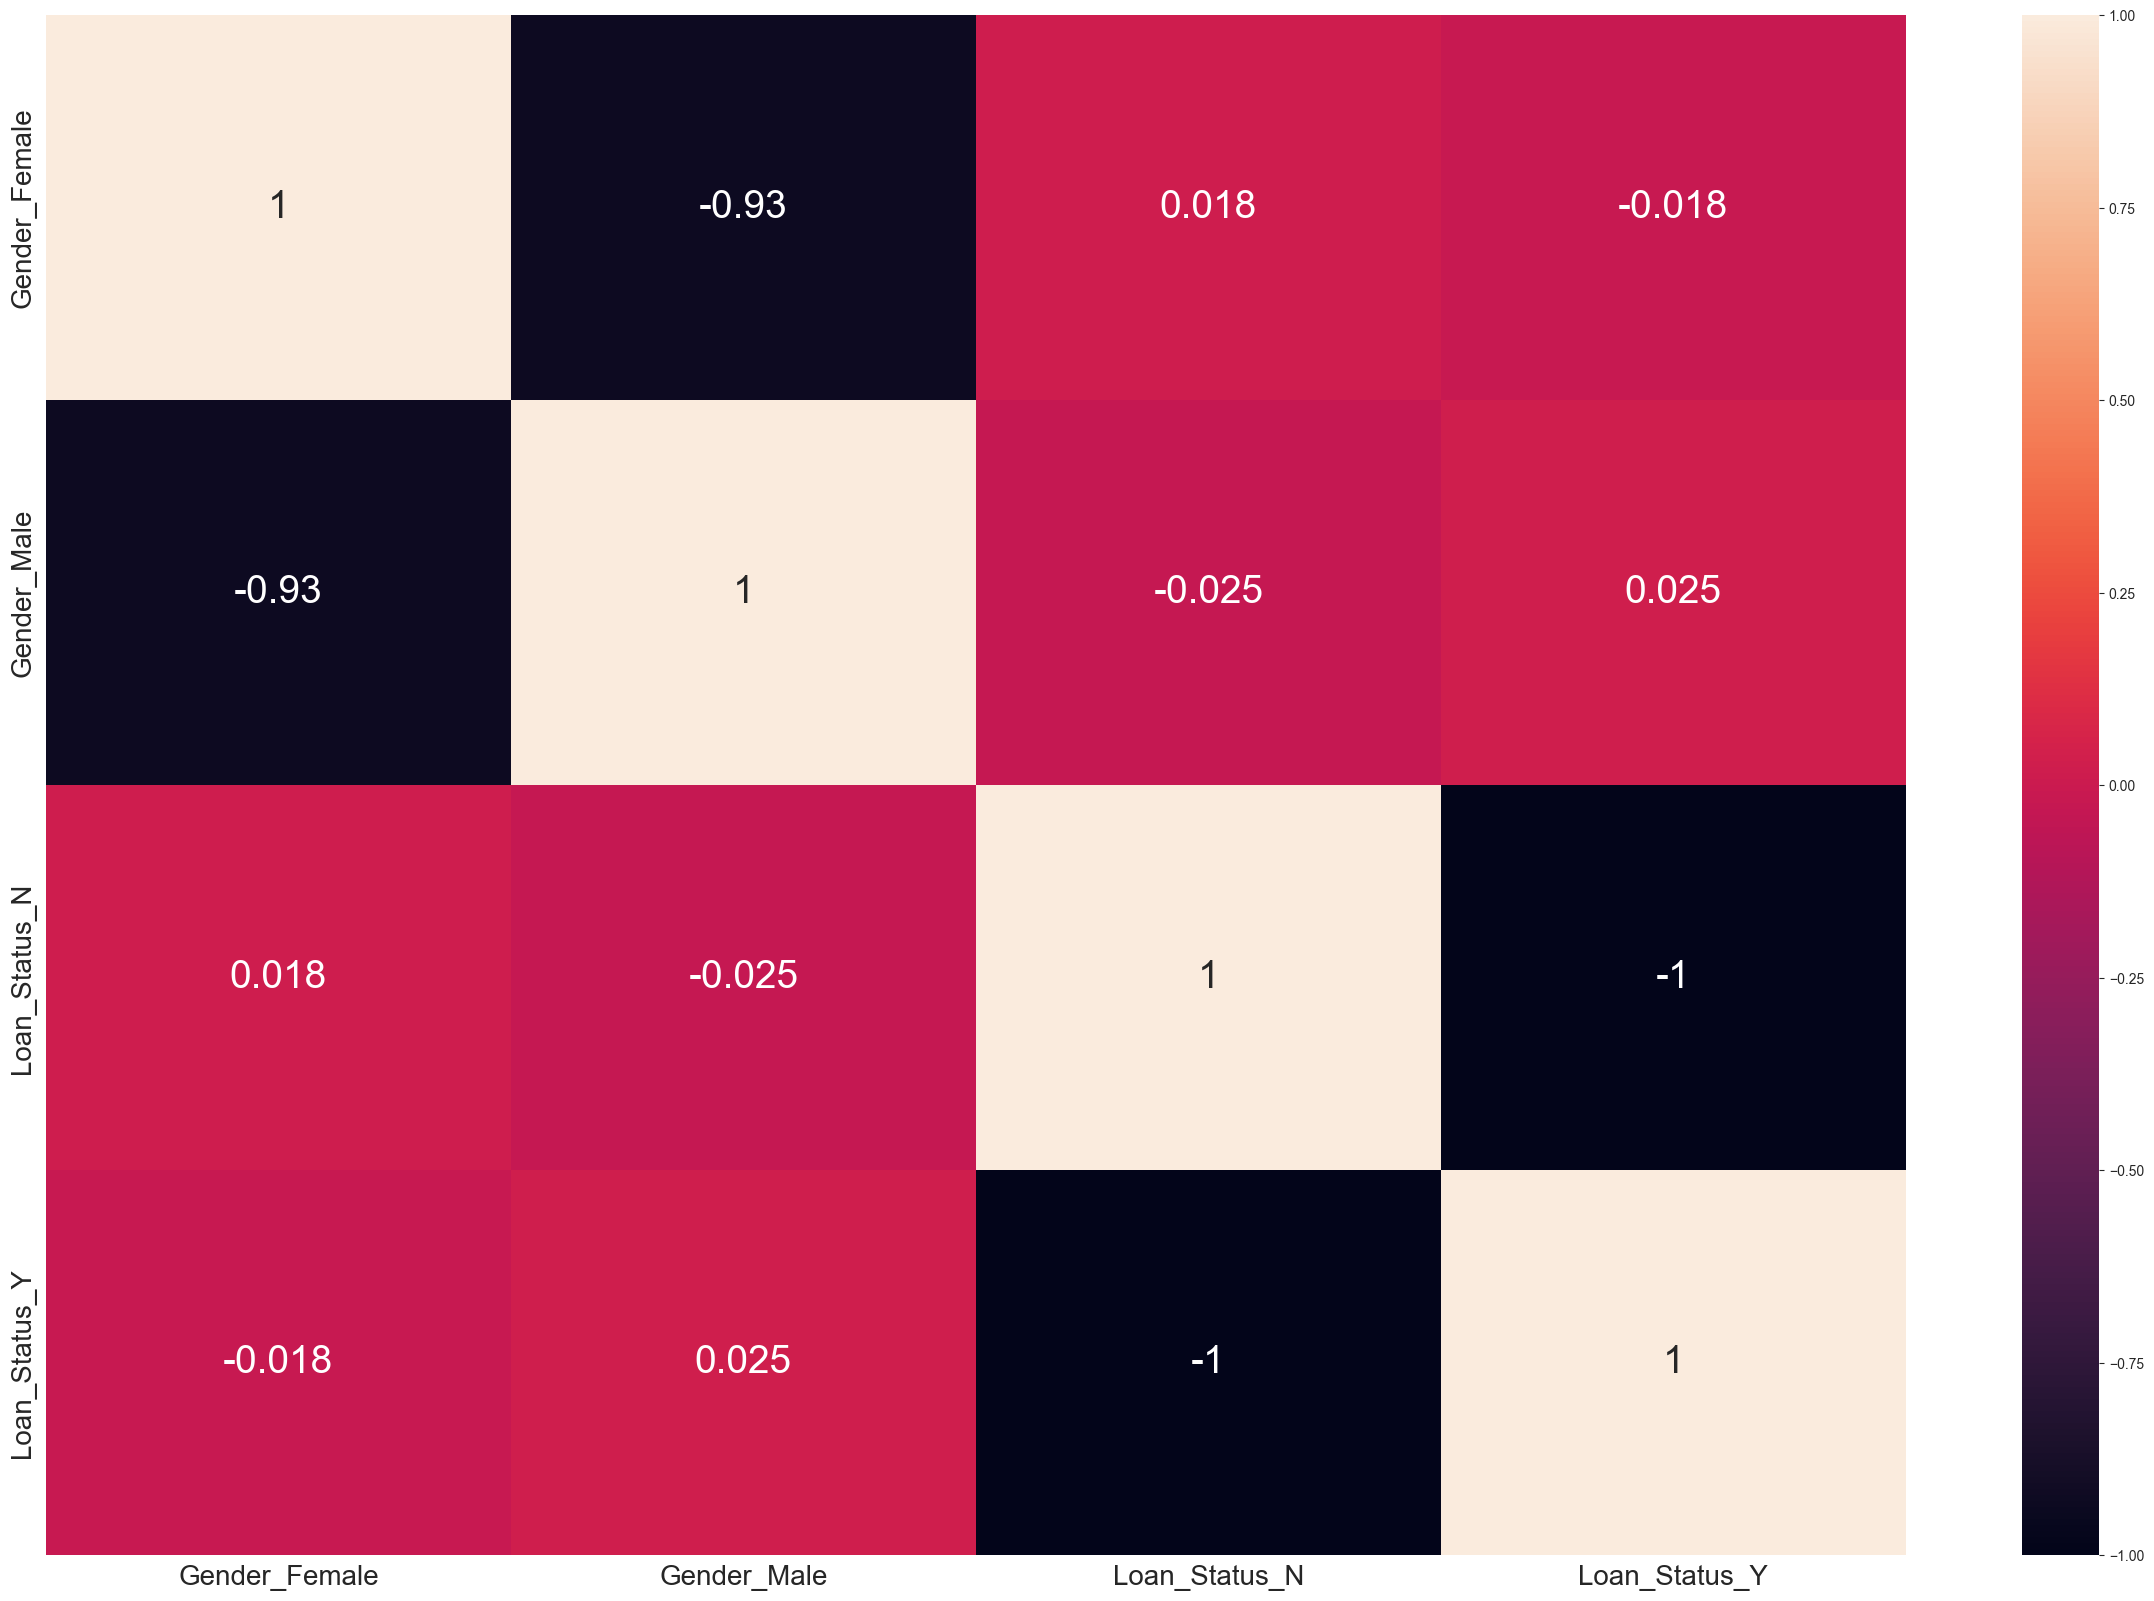

In [101]:
df_gender = df[['Gender', 'Loan_Status']]
df_gender_encoded = pd.get_dummies(df_gender)
correlation = df_gender_encoded.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(data=correlation, annot=True, annot_kws={"size": 28})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

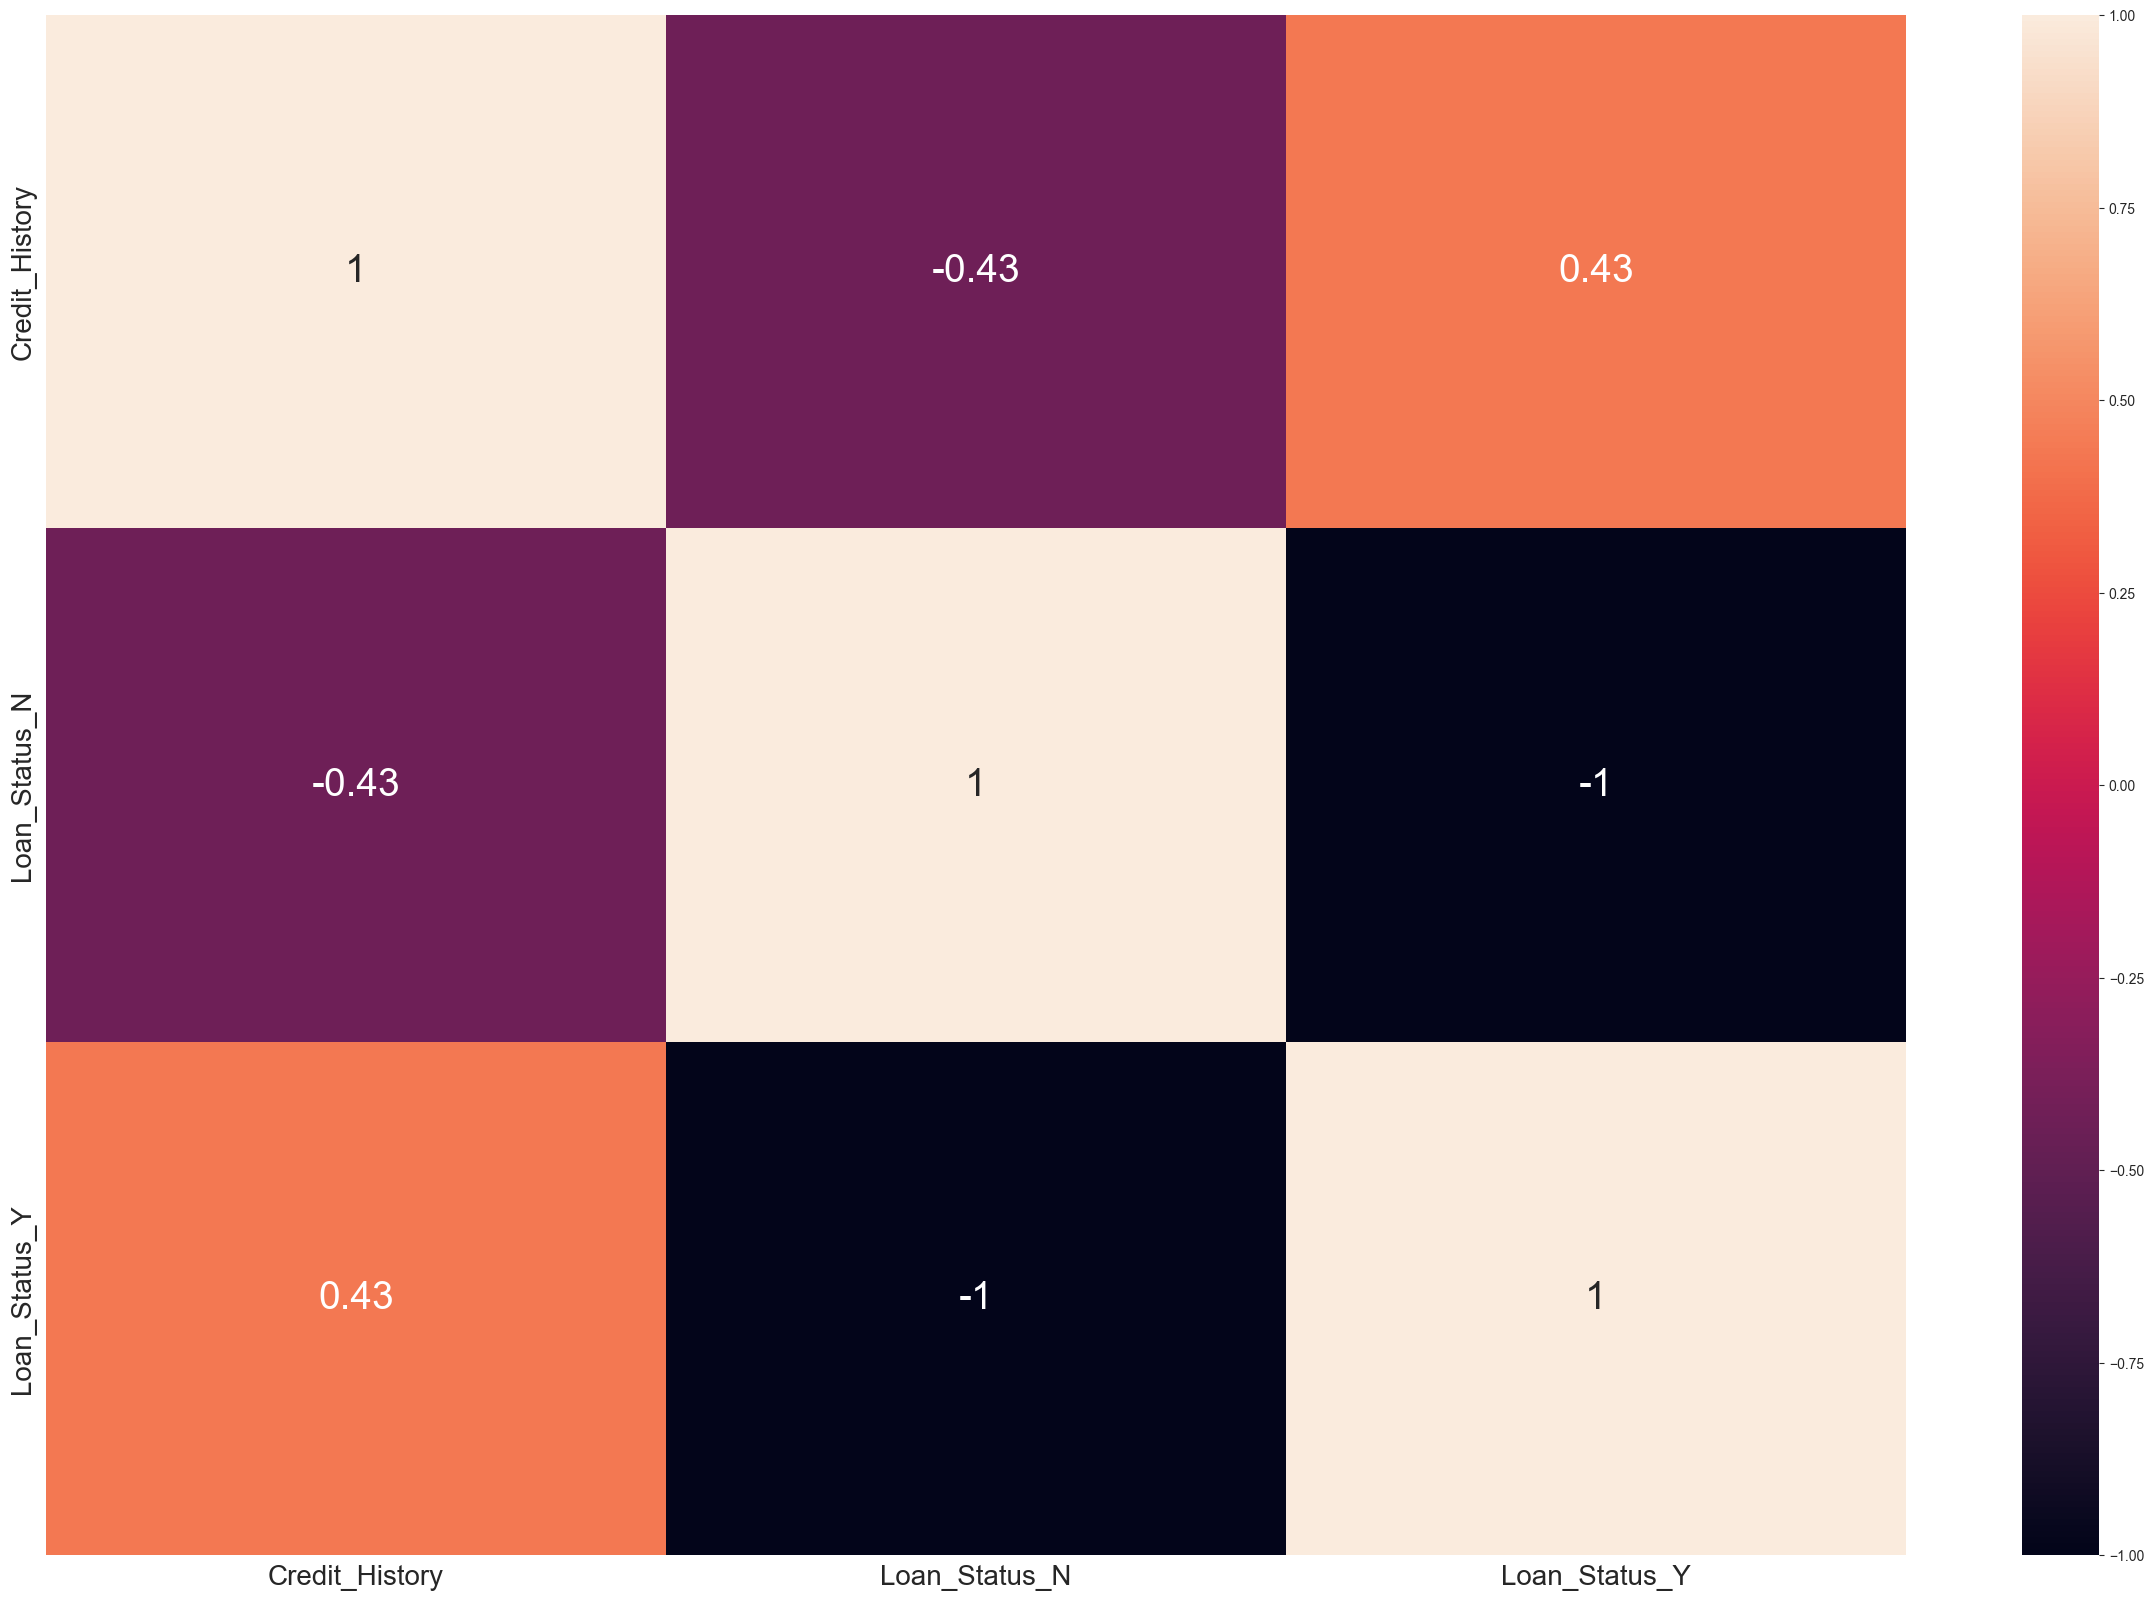

In [102]:
df_credit_history = df[['Credit_History', 'Loan_Status']]
df_credit_history_encoded = pd.get_dummies(df_credit_history)
correlation = df_credit_history_encoded.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(data=correlation, annot=True, annot_kws={"size": 28})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

There seems to be a moderate correlation relationship between the applicant's credit history and the loan status of investors. 

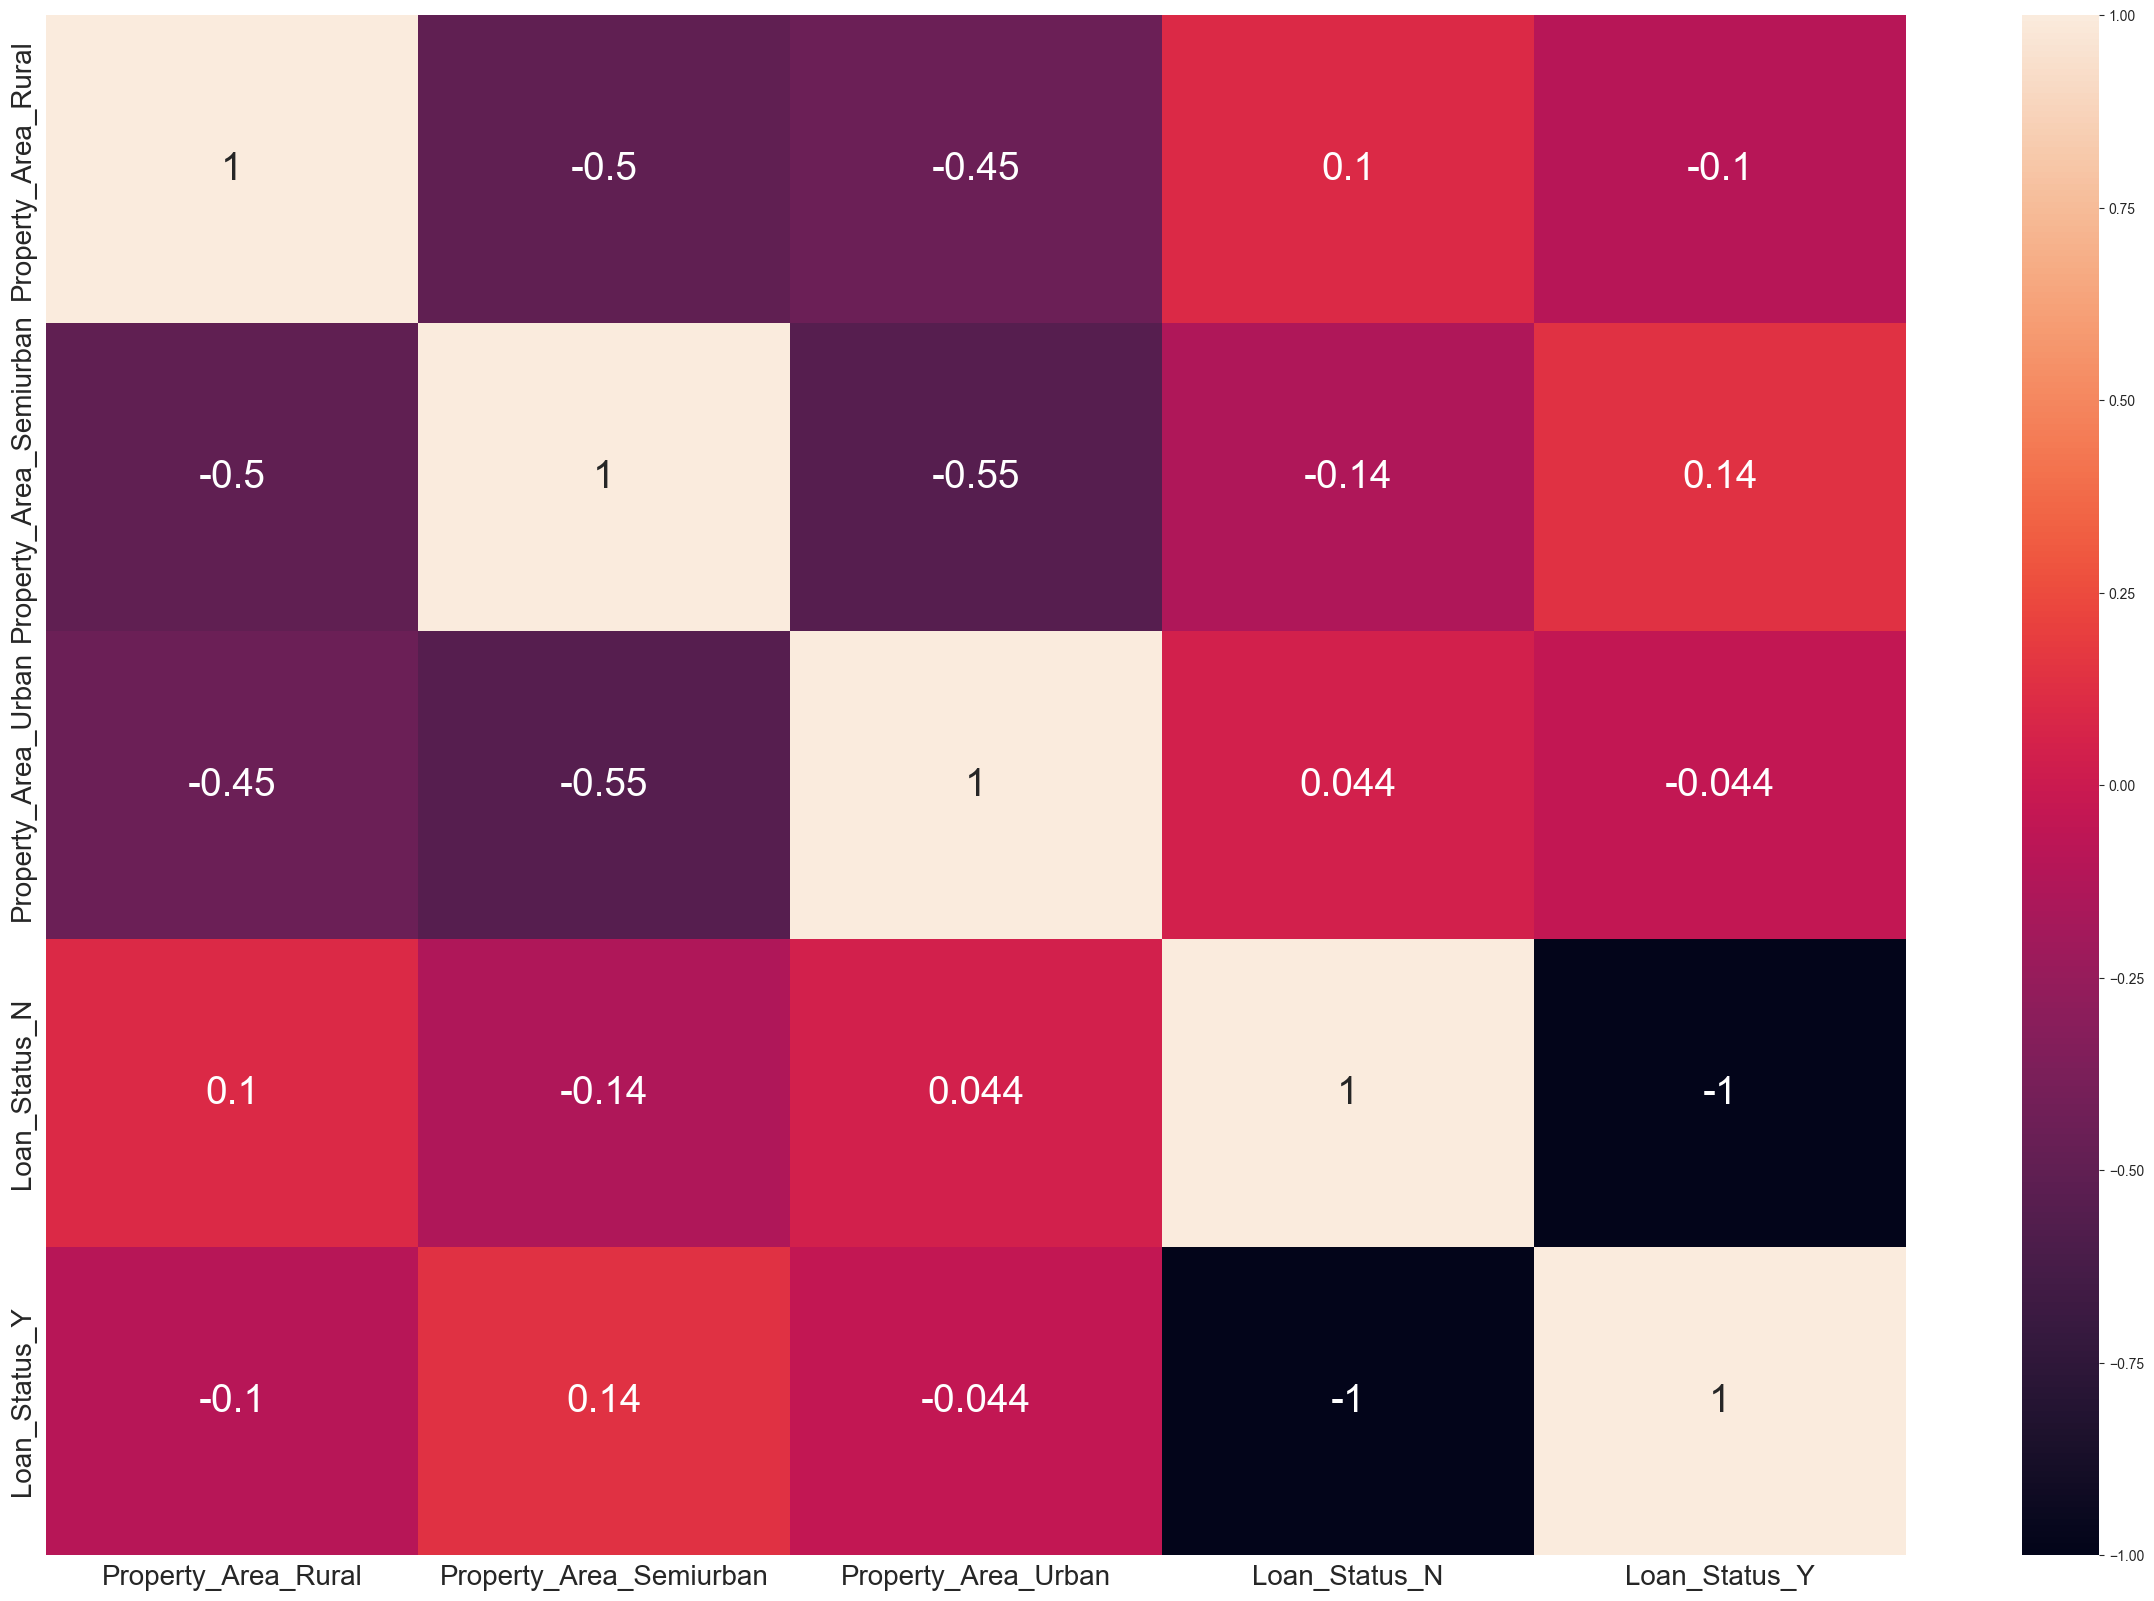

In [103]:
df_property_area = df[['Property_Area', 'Loan_Status']]
df_property_area_encoded = pd.get_dummies(df_property_area)
correlation = df_property_area_encoded.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(data=correlation, annot=True, annot_kws={"size": 28})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

Now, let's find the correlation between dependents and property area. 

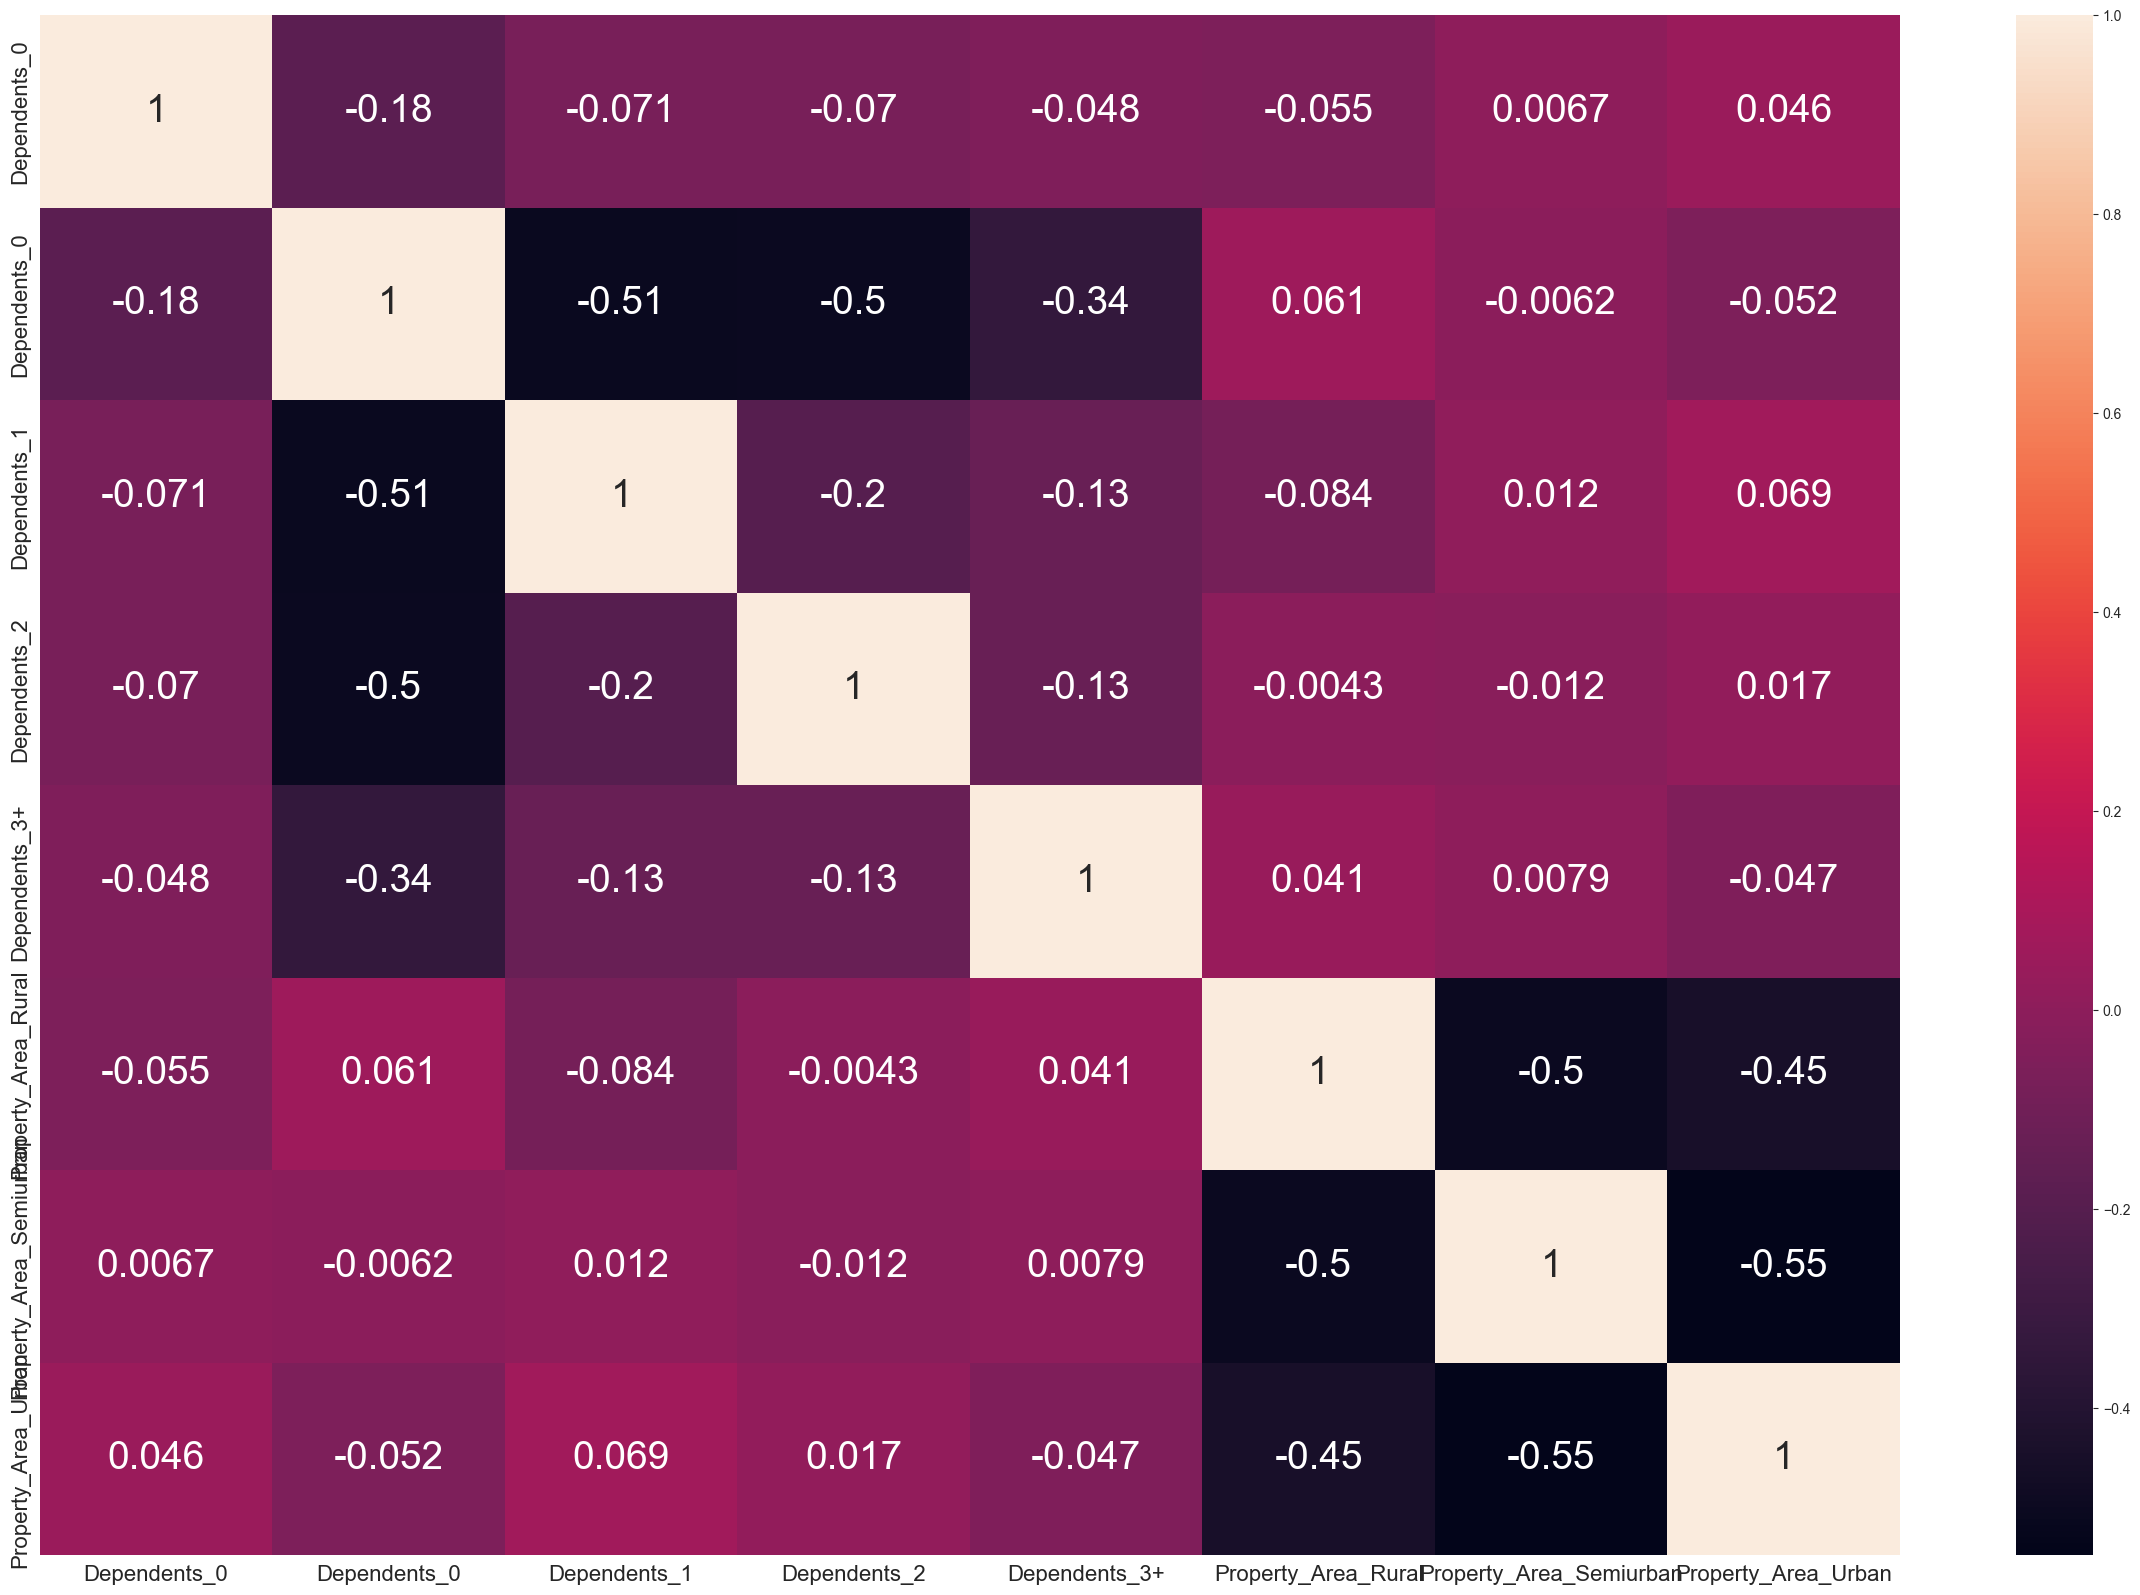

In [104]:
df_dependents_married = df[['Dependents', 'Property_Area']]
df_dependents_married_encoded = pd.get_dummies(df_dependents_married)
correlation = df_dependents_married_encoded.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(data=correlation, annot=True, annot_kws={"size": 28})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Now, let's find the correlation between credit history and the length of the loan amount term.

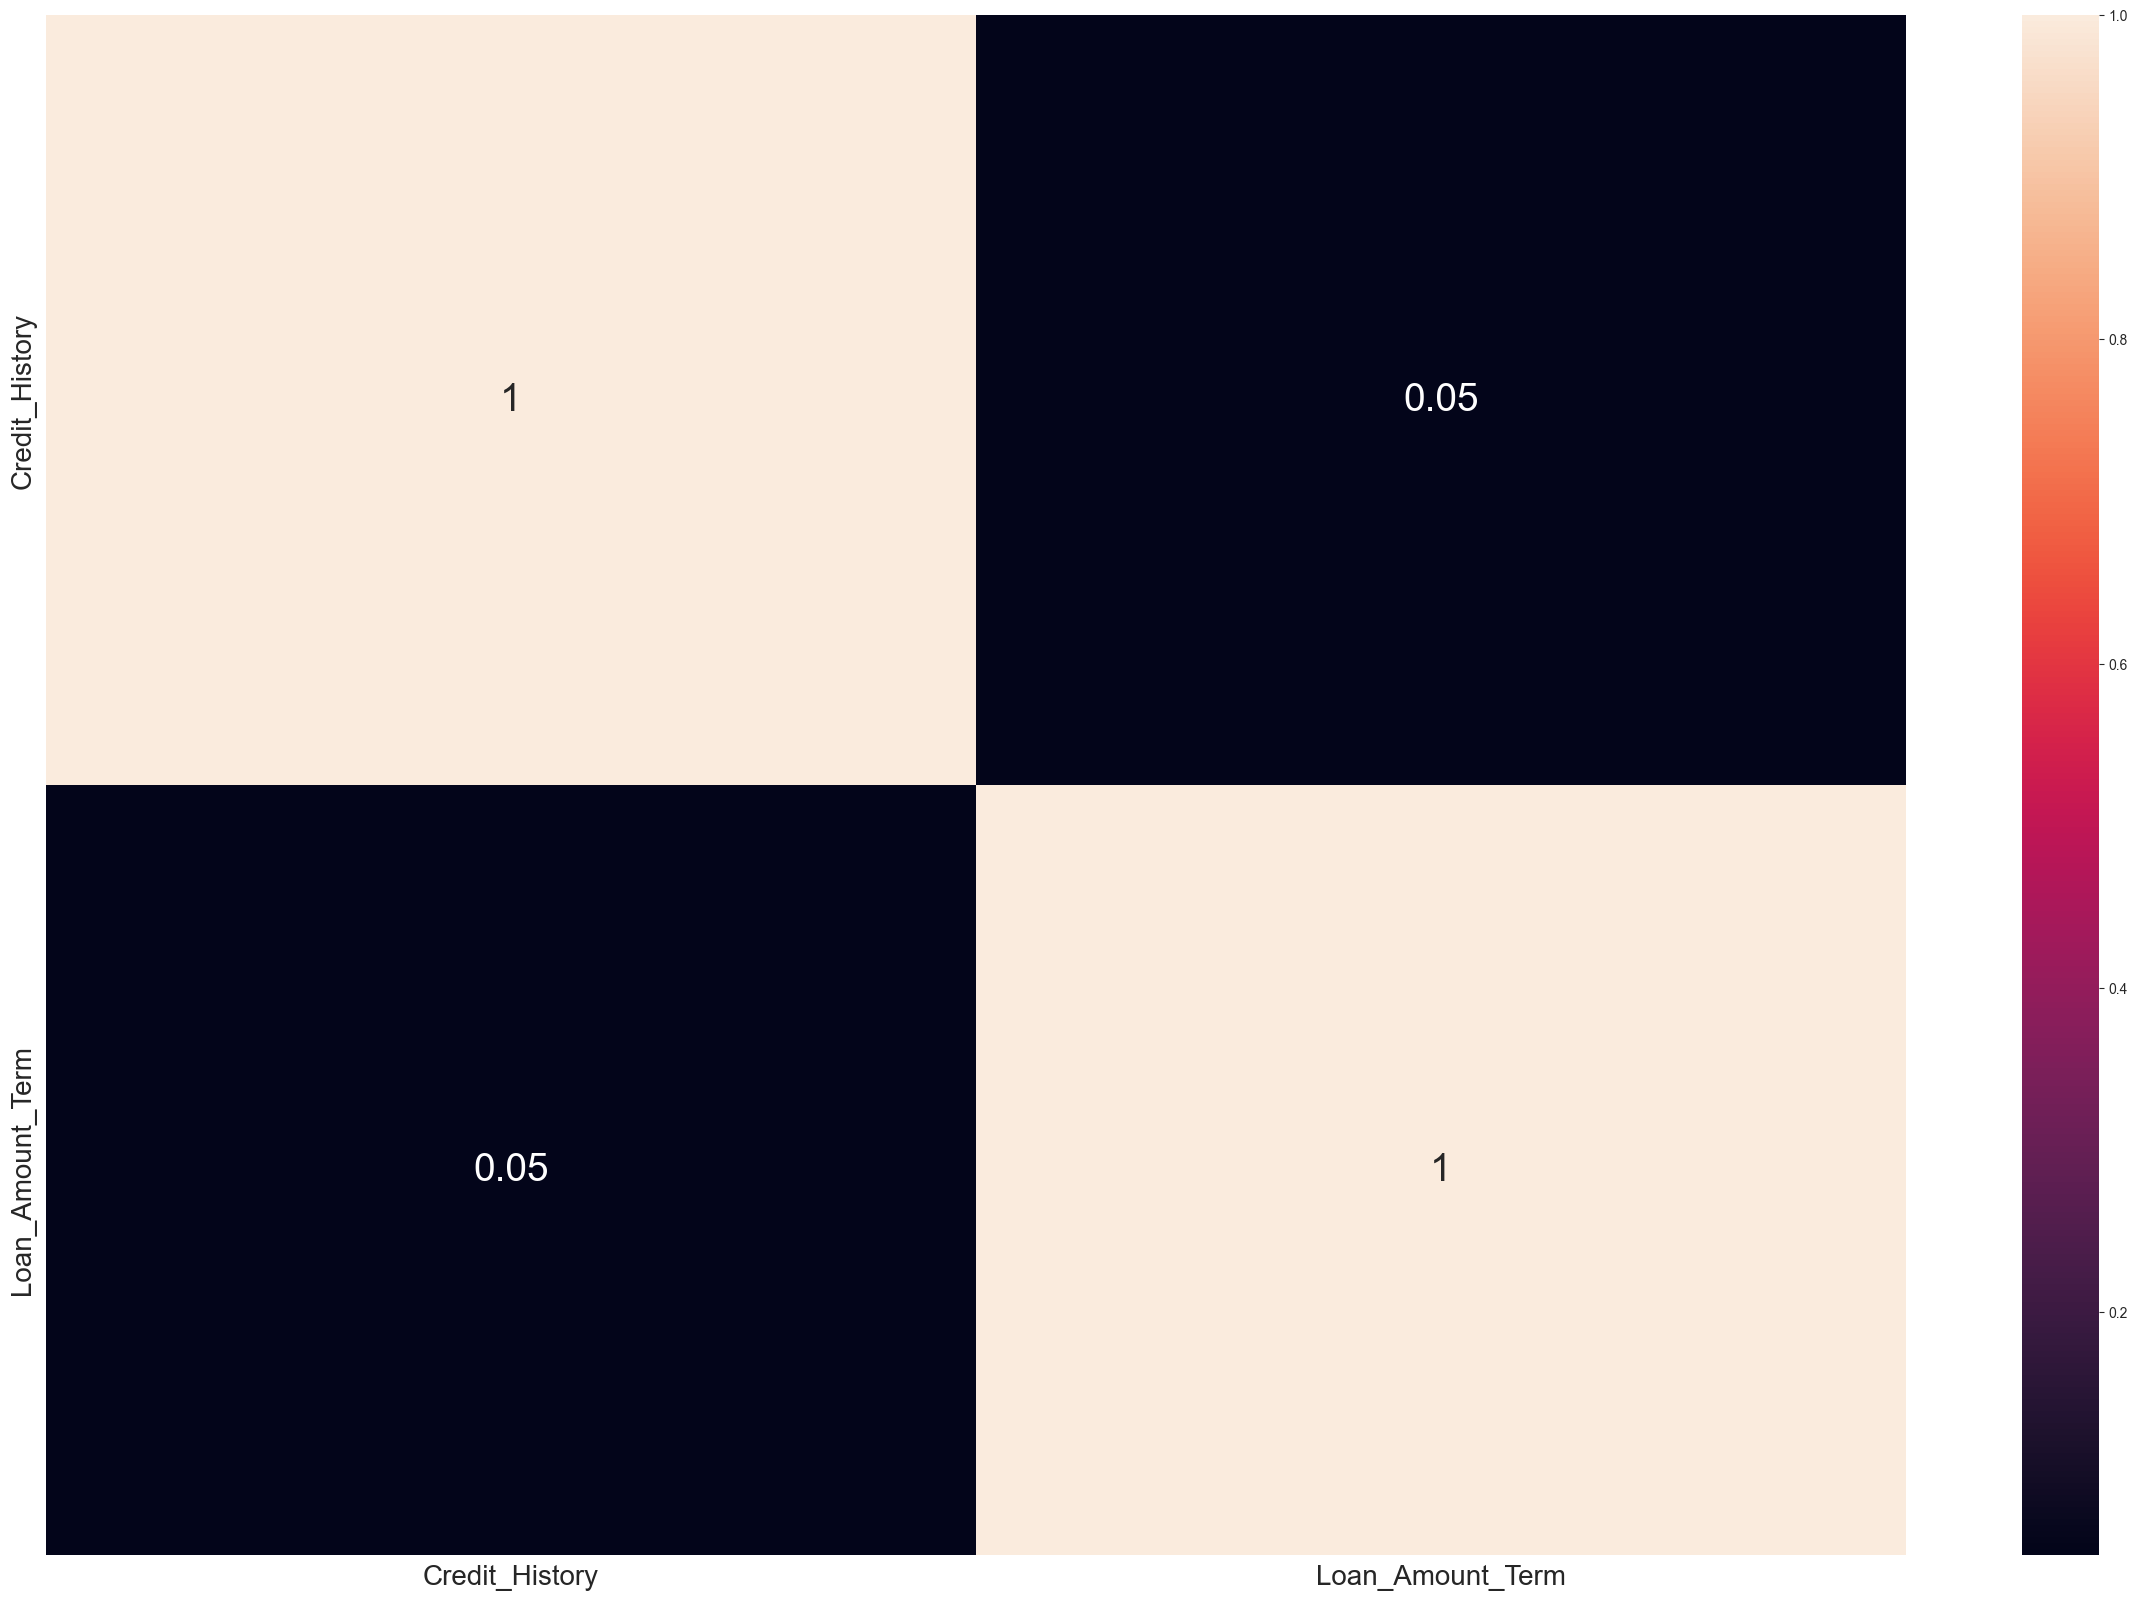

In [105]:
df_credit_loanterm = df[['Credit_History', 'Loan_Amount_Term']]
df_credit_loanterm_encoded = pd.get_dummies(df_credit_loanterm)
correlation = df_credit_loanterm_encoded.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(data=correlation, annot=True, annot_kws={"size": 28})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

We want to look for the correlation between the loan status and the amount that was loaned out to the applicant. 

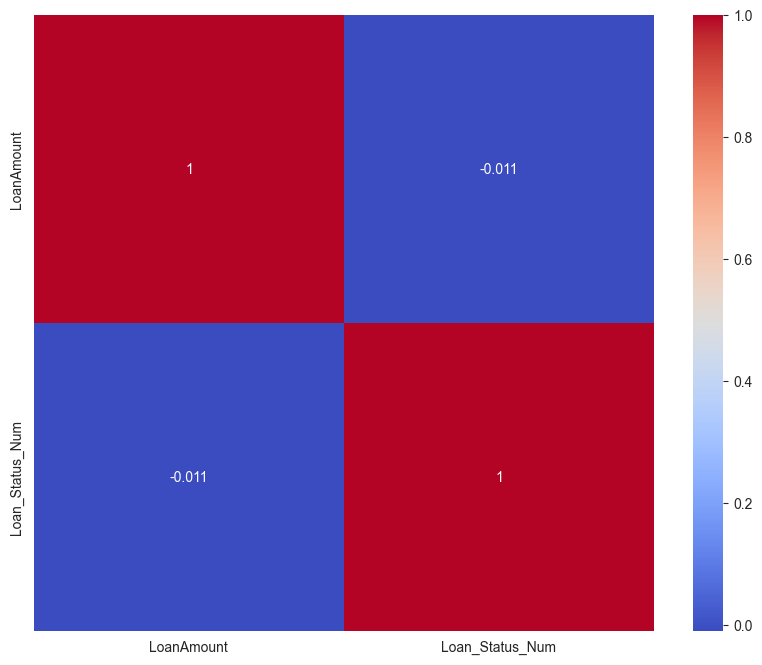

In [106]:
# Convert 'Loan_Status' to numerical values
df['Loan_Status_Num'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Select numerical columns and 'Loan_Status_Num'
numerical_cols = ['LoanAmount', 'Loan_Status_Num']  # Add more numerical columns if needed
df_numerical = df[numerical_cols]

# Calculate correlation
correlation = df_numerical.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

Now, let's find the correlation between laon amount and the applicant income. 

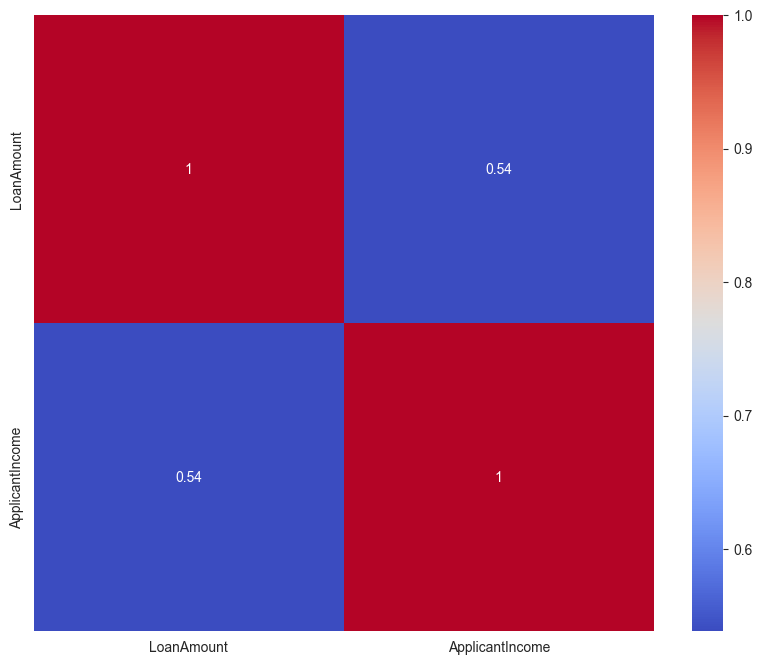

In [107]:
# Select numerical columns and 'Loan_Status_Num'
numerical_cols = ['LoanAmount', 'ApplicantIncome']  # Add more numerical columns if needed
df_numerical = df[numerical_cols]

# Calculate correlation
correlation = df_numerical.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

We want to see if there is any relationship between the loan amount and the coapplicant income. 

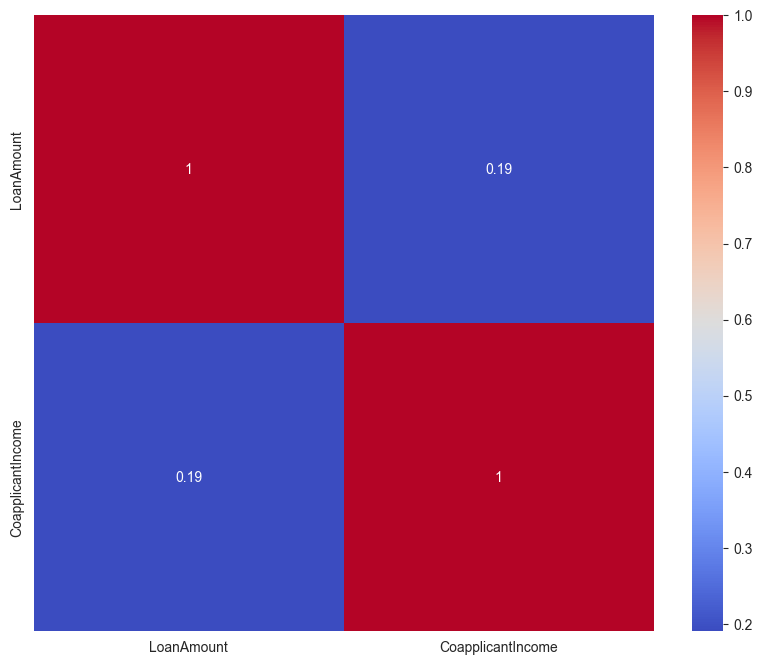

In [108]:
# Select numerical columns and 'Loan_Status_Num'
numerical_cols = ['LoanAmount', 'CoapplicantIncome']  # Add more numerical columns if needed
df_numerical = df[numerical_cols]

# Calculate correlation
correlation = df_numerical.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

We want to find if there is a relationship between the applicant's income and the loan status. We have to encode the loan status to be able to see the correlation between the both of them.

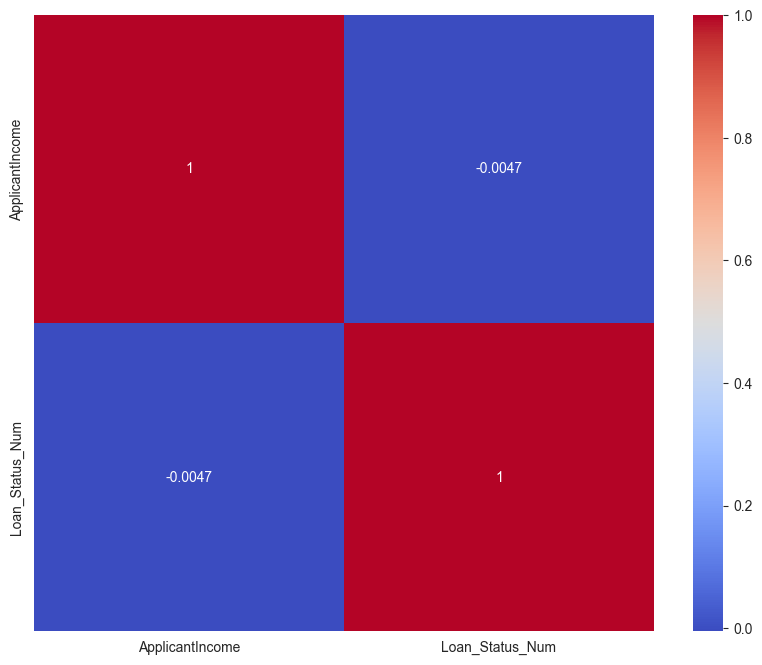

In [109]:
# Convert 'Loan_Status' to numerical values
df['Loan_Status_Num'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Select numerical columns and 'Loan_Status_Num'
numerical_cols = ['ApplicantIncome', 'Loan_Status_Num']  # Add more numerical columns if needed
df_numerical = df[numerical_cols]

# Calculate correlation
correlation = df_numerical.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

Now we want to see if there is a relationship between the loan status and the coapplicant income. 

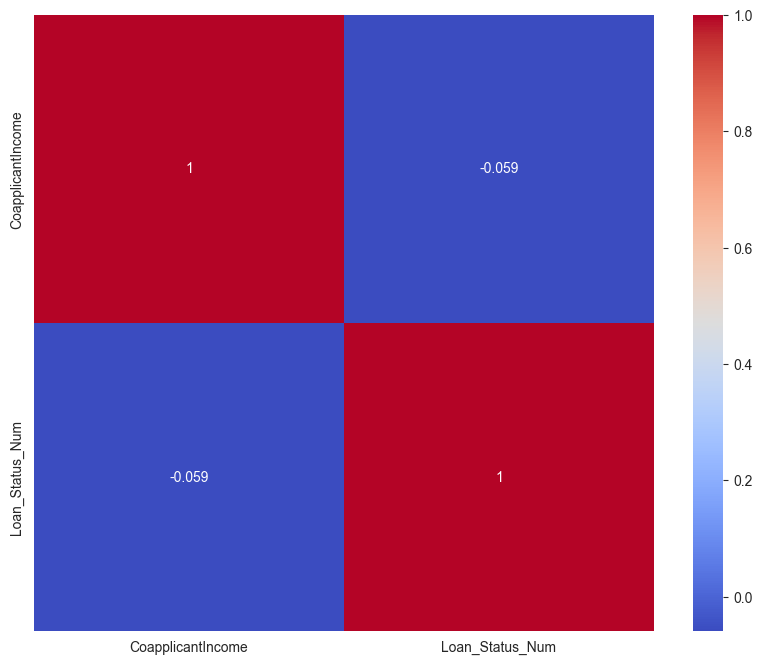

In [110]:
# Convert 'Loan_Status' to numerical values
df['Loan_Status_Num'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Select numerical columns and 'Loan_Status_Num'
numerical_cols = ['CoapplicantIncome', 'Loan_Status_Num']  # Add more numerical columns if needed
df_numerical = df[numerical_cols]

# Calculate correlation
correlation = df_numerical.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.show()

Now we have to find the correlation between the self employed status and the loan status. 

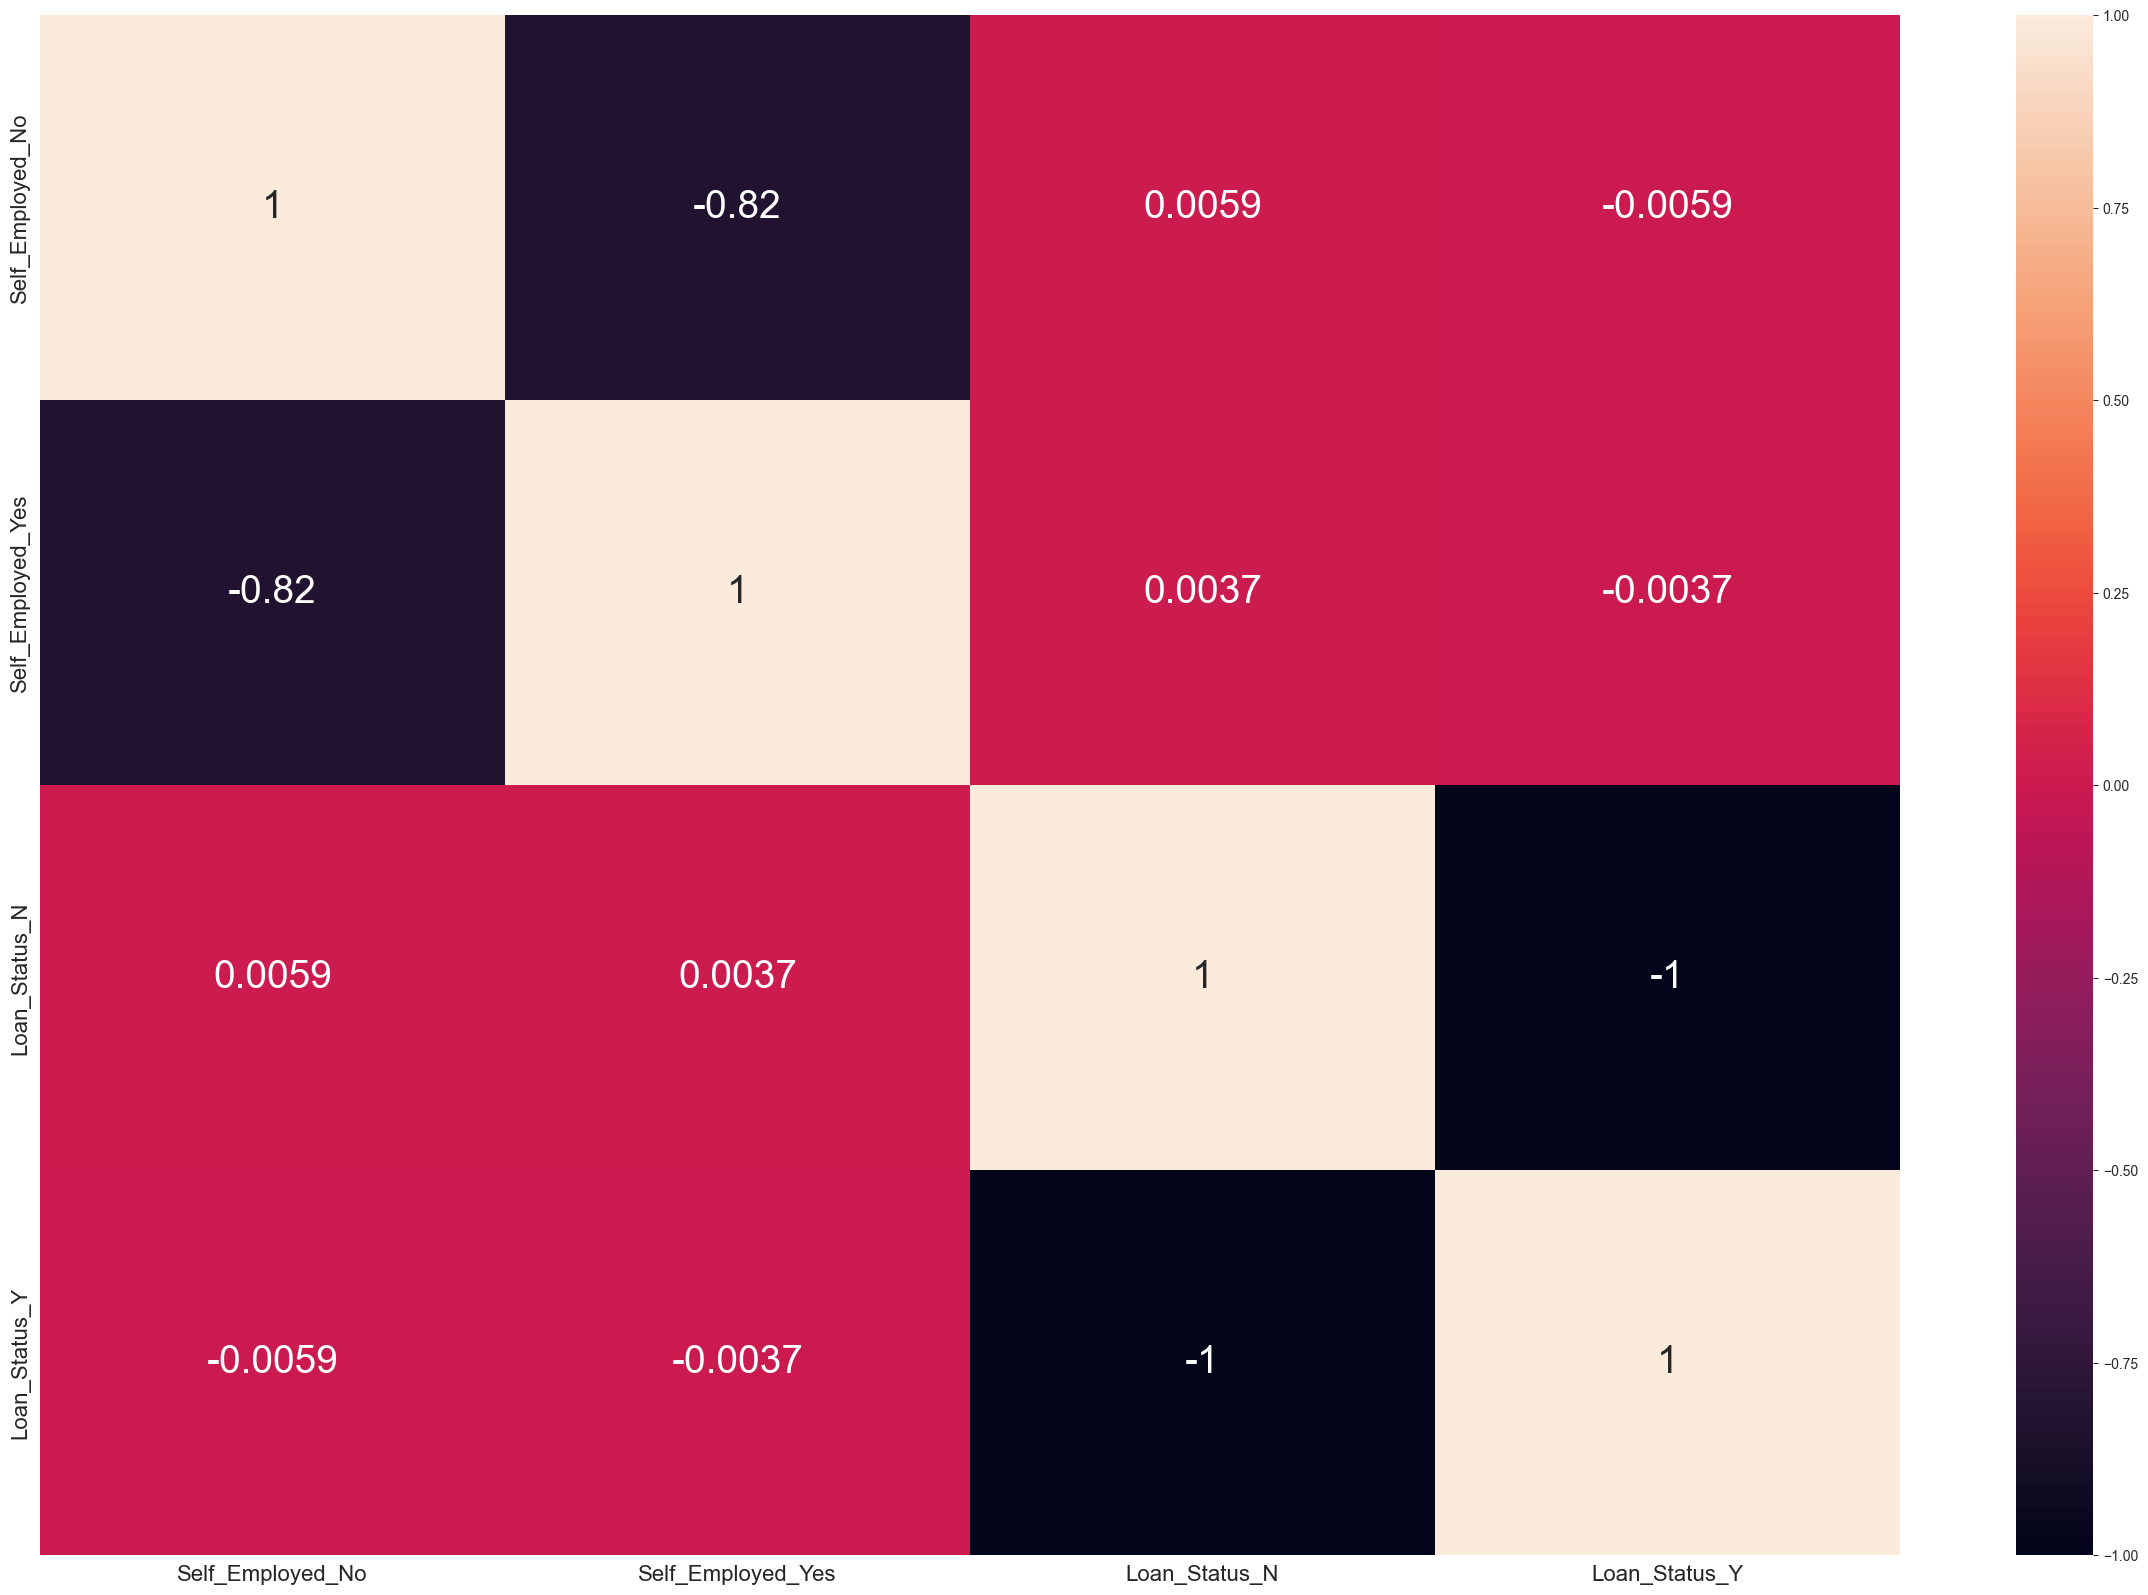

In [111]:
df_employment_loan_status = df[['Self_Employed', 'Loan_Status']]
df_employment_loan_status_encoded = pd.get_dummies(df_employment_loan_status)
correlation = df_employment_loan_status_encoded.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(data=correlation, annot=True, annot_kws={"size": 28})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

Now we want to find the relationship between loan status and the and people who graduated.

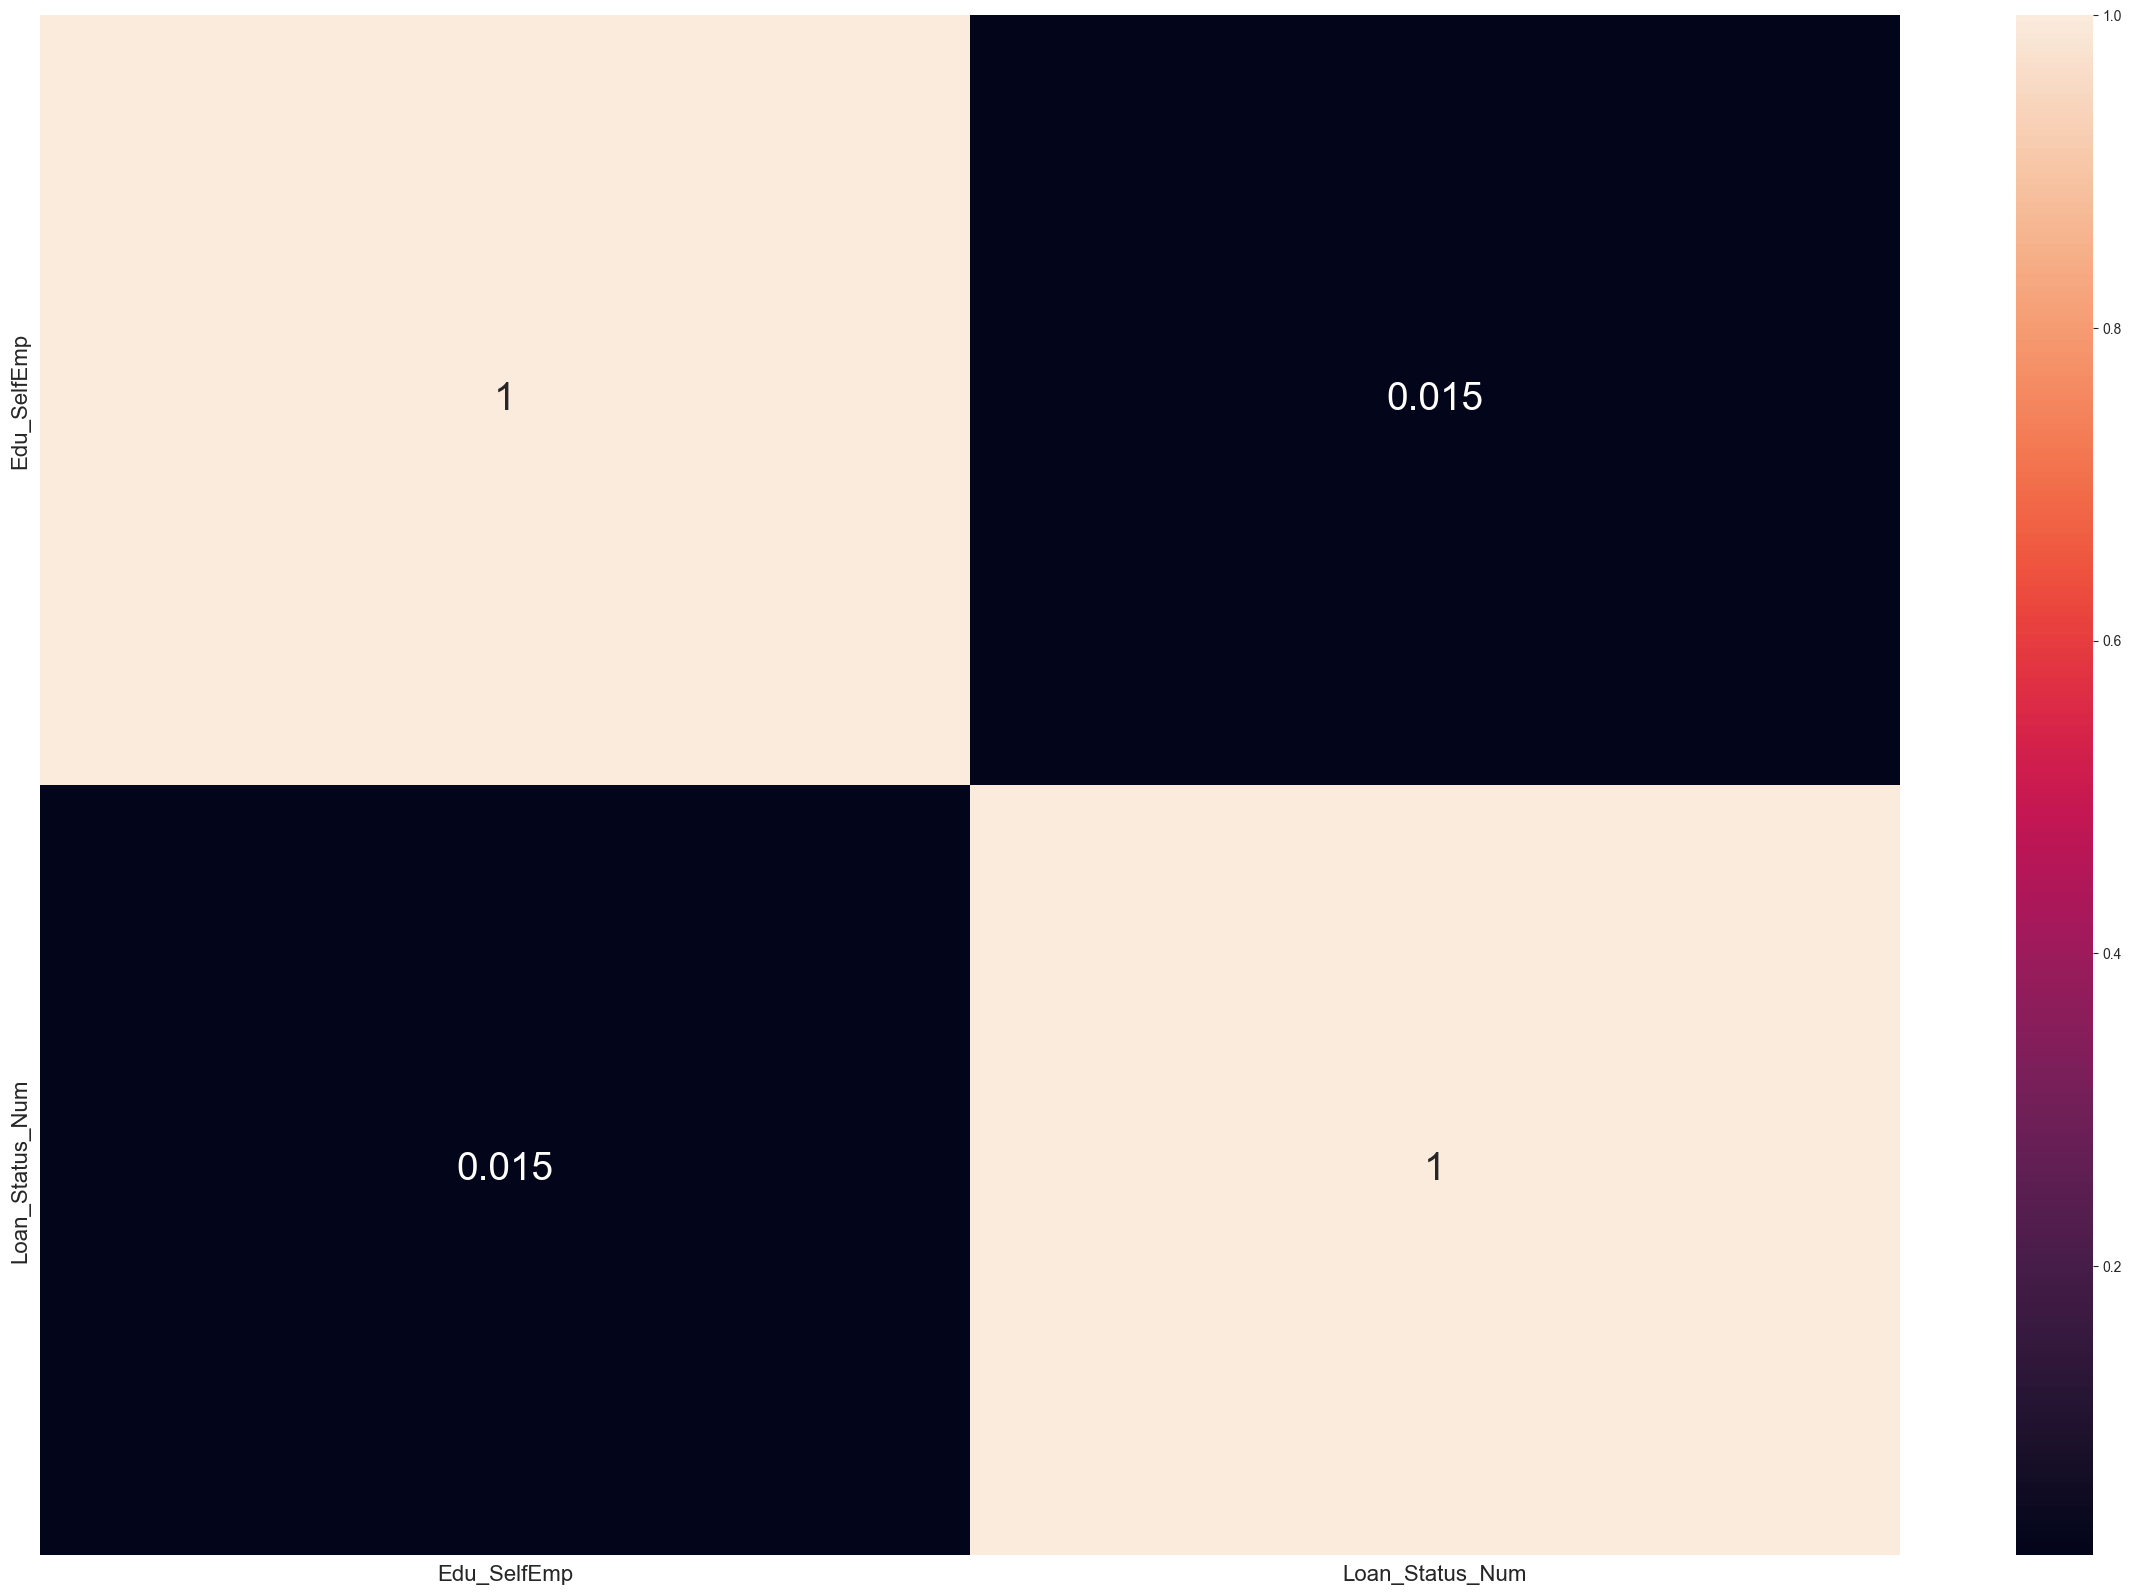

In [112]:
# Convert 'Loan_Status' to numerical values
df['Loan_Status_Num'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Convert 'Education' to numerical values using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Education', 'Self_Employed'])

# Create a new column that is a combination of 'Education_Graduate' and 'Self_Employed_Yes'
df_encoded['Edu_SelfEmp'] = df_encoded['Education_Graduate'] * df_encoded['Self_Employed_Yes']

# Select columns and 'Loan_Status_Num'
selected_cols = ['Edu_SelfEmp', 'Loan_Status_Num']
df_selected = df_encoded[selected_cols]

# Calculate correlation
correlation = df_selected.corr()

plt.figure(figsize=(30, 20))
sns.heatmap(data=correlation, annot=True, annot_kws={"size": 28})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

We now want to find if there is a relationship between education/credit history and loan status. 

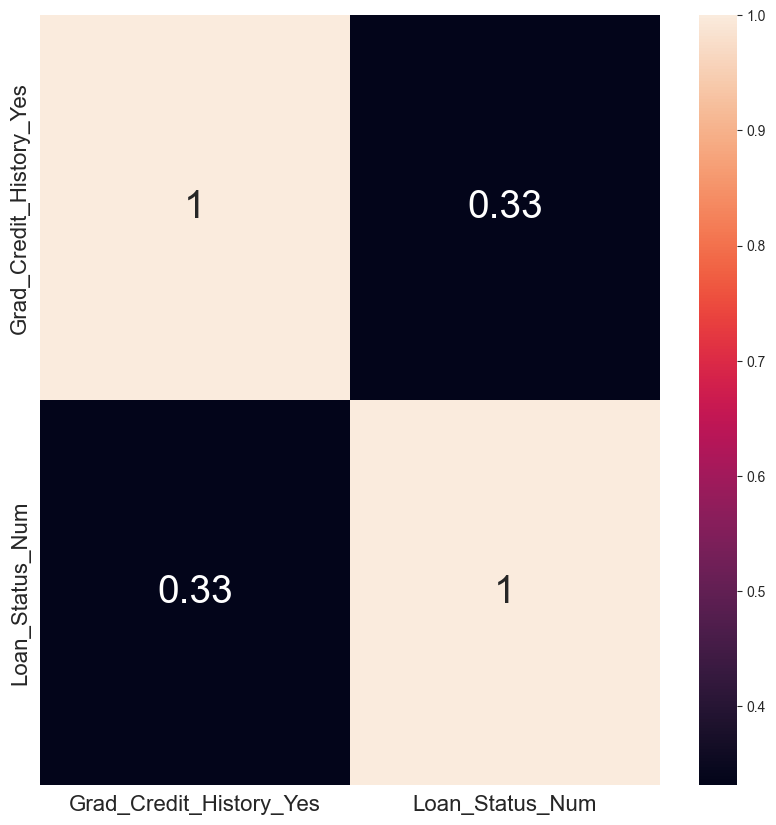

In [113]:
# Convert 'Loan_Status' to numerical values
df['Loan_Status_Num'] = df['Loan_Status'].map({'Y': 1, 'N': 0})

# Convert 'Education' to numerical values using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Education', 'Credit_History'])

# Create a new column that is a combination of 'Education_Graduate' and 'Self_Employed_Yes'
df_encoded['Grad_Credit_History_Yes'] = df_encoded['Education_Graduate'] * df_encoded['Credit_History_1.0']

# Select columns and 'Loan_Status_Num'
selected_cols = ['Grad_Credit_History_Yes', 'Loan_Status_Num']
df_selected = df_encoded[selected_cols]

# Calculate correlation
correlation = df_selected.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(data=correlation, annot=True, annot_kws={"size": 28})
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

There doesn't seem to be any strong correlation between any of the categories. The next step is to make a binary classification model, and most likely do some feature engineering from there.  

In [114]:
df = df.drop('Loan_Status', axis=1)
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df = df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis=1)

In [115]:
# Create a new dataframe that encodes the categorical data.
new_df_encoded = pd.get_dummies(df)

In [117]:
# Getting the features
features = new_df_encoded.columns.tolist()
y = new_df_encoded.Loan_Status_Num
features.remove('Loan_Status_Num')
# Getting the features we will use. 
X = new_df_encoded[features]

# Splitting the data into train and testing data.
X_train, val_X, y_train, val_y = train_test_split(X, y, test_size=0.3, random_state=0)

              precision    recall  f1-score   support

           0       0.67      0.43      0.52        51
           1       0.81      0.92      0.86       134

    accuracy                           0.78       185
   macro avg       0.74      0.67      0.69       185
weighted avg       0.77      0.78      0.77       185



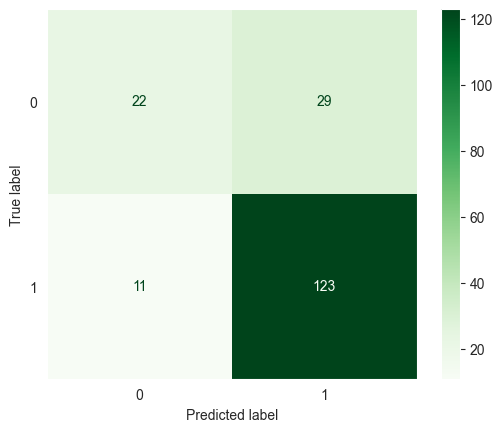

True Negatives: 22
False Positives: 29
False Negatives: 11
True Positives: 123


In [118]:
# Creating the model.
logistic_model = LogisticRegression()

# Fitting the data.
logistic_model.fit(X_train, y_train)

predictions = logistic_model.predict(val_X)
print(classification_report(val_y, predictions))
cm = confusion_matrix(val_y, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Change color of the heatmap of the confusion matrix. 

disp.plot(cmap='Greens')
plt.grid(False)
plt.show()
# Create a DataFrame from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Format them into a string
result_string = f"True Negatives: {tn}\nFalse Positives: {fp}\nFalse Negatives: {fn}\nTrue Positives: {tp}"

print(result_string)

Let's see if we can improve the precision of the model. Let's remove some categories which were shown to have a low correlation.

              precision    recall  f1-score   support

           0       0.67      0.47      0.55        51
           1       0.82      0.91      0.86       134

    accuracy                           0.79       185
   macro avg       0.74      0.69      0.71       185
weighted avg       0.78      0.79      0.78       185



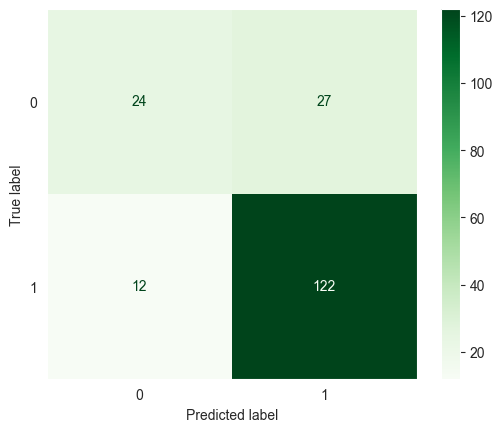

True Negatives: 24
False Positives: 27
False Negatives: 12
True Positives: 122


In [119]:
features.remove('Gender_Male')
features.remove('Gender_Female')
features.remove('Married_Yes')
features.remove('Married_No')
features.remove('Dependents_0')
features.remove('Dependents_0')
features.remove('Dependents_1')
features.remove('Dependents_2')
features.remove('Dependents_3+')
features.remove('Property_Area_Urban')
features.remove('Property_Area_Semiurban')
features.remove('Property_Area_Rural')
features.remove('Loan_Amount_Term')
features.remove('LoanAmount')
# Getting the features we will use. 
X = new_df_encoded[features]

# Splitting the data into train and testing data.
X_train, val_X, y_train, val_y = train_test_split(X, y, test_size=0.3,
                                                  random_state=0)
# Creating the model.
logistic_model = LogisticRegression()

# Fitting the data.
logistic_model.fit(X_train, y_train)

predictions = logistic_model.predict(val_X)
print(classification_report(val_y, predictions))
cm = confusion_matrix(val_y, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Change color of labels

disp.plot(cmap='Greens')
plt.grid(False)
plt.show()
from sklearn.metrics import confusion_matrix
import pandas as pd

# Assuming y_true are the true labels and y_pred are the predicted labels
y_true = val_y
y_pred = logistic_model.predict(val_X)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create a DataFrame from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Format them into a string
result_string = f"True Negatives: {tn}\nFalse Positives: {fp}\nFalse Negatives: {fn}\nTrue Positives: {tp}"

print(result_string)

We've removed a bunch of cells, and it seems to have improved the accuracy by a very small margin, showing that a lot of categories were redundant. We can also see that the model is much worse at predicting negative numbers that other things. 